### Assignment 1: Graphik
M.Sc. Operations Management: Datenanalyse 

Abgabetermin 13. Mai 2024

Teilnehmer: ---, ---, Max Otto Berth

# TEIL 1 - VERGLEICH ENERGIEVERBRAUCH, -HERSTELLUNG UND WETTERDATEN

Leitfrage ist, wie sich unterschiedliche Wetterbedingungen auf den Stromverbrauch auswirken. Sind Deutsche bei Regenwetter eher dazu geneigt, zu Hause zu bleiben und mehr Strom zu verbrauchen? Oder sorgt eine Hitzewelle dafür, dass alle ihre Klimaanlagen auf Hochtouren laufen lassen? Gibt es eine Korrelation zwischen Wetter und bestimmten Arten der Stromerzeugung?

Die Wetterdaten beziehen wir von folgender Quelle: https://cdc.dwd.de/portal/202209231028/mapview
- Land: Deutschland  
- Zeitraum: 01.01.2023 - 31.12.2023
- Auflösung : stündlich

# Aufbereitung Wetterdaten

In den bereitgestellten CSV-Dateien befindet sich am Ende jeder Zeile ein zusätzliches Komma, welches zu Problemen bei der Nutzung mit Pandas führt. Dies führt dazu, dass die Spaltenüberschriften um ein Feld nach rechts verschoben werden und eine zusätzliche Spalte mit NaN-Werten erstellt wird. Der untenstehende Code entfernt dieses störende „Trailing Comma“. Eine alternative Lösung wäre, diesen Schritt zu überspringen, um Zeit zu sparen, indem einfach die unnötigen Spalten entfernt und die verbleibenden umbenannt werden (Hier Auskommentiert, da das Verfahren einige Minuten in Anspruch nimmt und die Originaldaten als Grundlage benötigt). 

In [116]:
# import pandas as pd
# import csv
# from pprint import pprint
# import os

# folder = r"csv_data_part_1"
# filenames = os.listdir(folder)

# """
# ['Niederschlag_in_mm_data_OBS_DEU_PT1H_RR.csv',
#  'Sonnenschein_in minuten_data_OBS_DEU_PT1H_SD.csv',
#  'Temperatur_data_OBS_DEU_PT1H_T2M.csv',
#  'Windstaerke_in_m_pro_s_data_OBS_DEU_PT1H_FF.csv']
# """
# dfs = {}
# for file in filenames:
#     df_name = file[:4]
#     df = pd.read_csv(os.path.join(folder, file), quoting=csv.QUOTE_MINIMAL)
#     dfs[df_name] = df

# temperatures_df, rainfall_df, sunshine_df, wind_df = dfs["Temp"], dfs["Nied"], dfs["Sonn"], dfs["Wind"]

# print("Shape    ",temperatures_df.shape,"\n")
# print(temperatures_df.info(),"\n")
# # print("Info     ",temperatures_df.describe(),"\n") # doesn't make sense at that point

# # Check for nullvalues
# print(" "*19,"Non-Null Count:")
# print(temperatures_df.count(),"\n")

# temperatures_df.head()

# THIS WAS ALREADY DONE; DONT REPEAK (TAKES LOOOONG)
# Open the input CSV file in read mode
# clean_folder = r"cleaned_csvs"
# for file in filenames:
#     output_name = f"{file[:-4]}_clean.csv"

#     with open(os.path.join(folder, file), 'r', newline='') as input_file:
#         csv_reader = csv.reader(input_file)
#         modified_rows = []
#         for row in csv_reader:
#             if row:
#                 row.pop()  # Remove the last element (trailing comma) from each row
#                 modified_rows.append(row)  # Append the modified row to the list

#     # Open the output CSV file in write mode
#     with open(os.path.join(folder, clean_folder, output_name), 'w', newline='') as output_file:
#         csv_writer = csv.writer(output_file)
        
#         # We must recycle the old header because csv library somehow messed up the header transfer
#         csv_writer.writerow(temperatures_df.columns.to_list()) # assign original header
#         modified_rows = modified_rows[1:] # remove old header from data
#         csv_writer.writerows(modified_rows)

Wir beginnen mit der Konvertierung der gereinigten Daten in jeweils ein Dataframe für jede meteorologische Messgröße. Dann erstellen wir im Anschluß (auch _nach_ Zusammenführung mit den Energiedaten) separate DataFrames für stündliche, tägliche und andere Zeiträume - je nach gewünschter Visualierung. Diese einzelnen DataFrames werden schließlich zu einem umfassenden MasterDataFrame zusammengeführt. Dieser integrierte DataFrame ermöglicht eine effiziente Analyse und Verarbeitung der Wetterdaten.

In [117]:
import pandas as pd
import csv
import os
folder = r"csv_data_part_1"
clean_folder = r"cleaned_csvs"
clean_filenames = os.listdir(os.path.join(folder, clean_folder))

"""
['Niederschlag_in_mm_data_OBS_DEU_PT1H_RR_clean.csv',
 'Sonnenschein_in minuten_data_OBS_DEU_PT1H_SD_clean.csv',
 'Temperatur_data_OBS_DEU_PT1H_T2M_clean.csv',
 'Windstaerke_in_m_pro_s_data_OBS_DEU_PT1H_FF_clean.csv']
"""

dfs = {}
for file in clean_filenames:
    df_name = file[:4]
    df = pd.read_csv(os.path.join(folder, clean_folder, file), quoting=csv.QUOTE_MINIMAL)
    dfs[df_name] = df

temperatures_df, rainfall_df, sunshine_df, wind_df = dfs["Temp"], dfs["Nied"], dfs["Sonn"], dfs["Wind"] # never call those again!
separate_dfs = [temperatures_df, rainfall_df, sunshine_df, wind_df] # this list is the single source of truth

In [118]:
clean_filenames = os.listdir(os.path.join(folder, clean_folder))

"""
['Niederschlag_in_mm_data_OBS_DEU_PT1H_RR_clean.csv',
 'Sonnenschein_in minuten_data_OBS_DEU_PT1H_SD_clean.csv',
 'Temperatur_data_OBS_DEU_PT1H_T2M_clean.csv',
 'Windstaerke_in_m_pro_s_data_OBS_DEU_PT1H_FF_clean.csv']
"""

dfs = {}
for file in clean_filenames:
    df_name = file[:4]
    df = pd.read_csv(os.path.join(folder, clean_folder, file), quoting=csv.QUOTE_MINIMAL)
    dfs[df_name] = df

temperatures_df, rainfall_df, sunshine_df, wind_df = dfs["Temp"], dfs["Nied"], dfs["Sonn"], dfs["Wind"] # never call those again!
separate_dfs = [temperatures_df, rainfall_df, sunshine_df, wind_df] # this list is the single source of truth

### Betrachtung der Columns

In den bereitgestellten Daten werden keine NaN-Werte behandelt. Stattdessen liegt der Fokus auf der Entfernung unnötiger Spalten. „Qualitaet_Byte“ und „Qualitaet_Niveau“ sind nicht näher spezifiziert, während „Produkt_Code“ lediglich die Produkt-ID des Datenanbieters darstellt und in jedem Datensatz identisch ist - daher werden diese Spalten entfernt.

Bei SDO_ID handelt es sich um die Nummer der Wetterstation. Die SDO_ID wird in späteren Analysen für die Aufsplittung der Daten zur ansprechenden Visualisierung herangezogen.

Zur Überprüfung der Vollständigkeit der Datensätze der Wetterstationen wird angenommen, dass ein vollständiger Datensatz 24 Stunden mal 365 Tage, also 8.760 Datenpunkte pro Jahr, enthalten sollte. Dieser Wert ist in den fortfolgenden Analysen mehrmals (korrekt) ersichtlich.

In [119]:
temperatures_df.head()

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau
0,OBS_DEU_PT1H_T2M,1001,2023-01-01T00:00:00,16.8,5,7
1,OBS_DEU_PT1H_T2M,1001,2023-01-01T01:00:00,16.4,5,7
2,OBS_DEU_PT1H_T2M,1001,2023-01-01T02:00:00,16.4,5,7
3,OBS_DEU_PT1H_T2M,1001,2023-01-01T03:00:00,15.8,5,7
4,OBS_DEU_PT1H_T2M,1001,2023-01-01T04:00:00,14.9,1,7


In [120]:
# Check unique weather stations of each dataset
df_names = ["temperatures_df", "rainfall_df", "sunshine_df", "wind_df"]
df_units = ["Temp [°C]","Rain [mm]","Sunshine [min]","Wind [m/s]"]

columns_to_drop = ["Produkt_Code", "Qualitaet_Byte", "Qualitaet_Niveau"]
for i, df in enumerate(separate_dfs): 
    df.drop(columns=columns_to_drop, inplace=True) # drop columns
    print("Distinct weather stations in ", df_names[i], ": ",df["SDO_ID"].nunique())


Distinct weather stations in  temperatures_df :  499
Distinct weather stations in  rainfall_df :  1018
Distinct weather stations in  sunshine_df :  240
Distinct weather stations in  wind_df :  300


Die Daten wurden zunächst bereinigt, bevor sie zusammengeführt wurden, da sie von verschiedenen Wetterstationen stammen und sich in ihrer Menge unterscheiden. Dieser Schritt war notwendig, um eine einheitliche stündliche Datenbasis zu schaffen. Durch die Bereinigung vor der Zusammenführung wurde sichergestellt, dass die Daten konsistent sind, was eine effektive Analyse und Integration ermöglicht.

In [121]:
control_numbers = []
complete_datasets = []
recording_hours_of_stations = []
for i, df in enumerate(separate_dfs): 
    _data = []

    # All weather stations
    all = int(separate_dfs[i]["SDO_ID"].nunique())

    # The hypothetical number of rows of the dataset, given that all involved stations measure hourly for 365 days
    _hours_station = 24 if df_names[i] != "sunshine_df" else 18
    recording_hours_of_stations.append(_hours_station)

    control_number = 365 * _hours_station
    control_numbers.append(control_number)
    print(f"Control Number Dataframe {i+1}: {control_number}")

    # Iterate over unique values and their counts
    unique_values = separate_dfs[i]["SDO_ID"].value_counts()
    new_col_name = f"{df_names[i]} rows each station"
    for uv, count in unique_values.items():
        _data.append({'uv': uv, new_col_name: count})
    _result_df = pd.DataFrame(_data)

    _result_df['datasets'] = 1 # a helper column to find the number of datasets
    # Group the DataFrame by the "count" column and sum the "datasets" column
    _grouped_df = _result_df.groupby(new_col_name).agg({'datasets':'sum'}).reset_index()
    _grouped_df["p of all"] = _grouped_df['datasets']/all

    complete_datasets.append(_grouped_df.iloc[-1]['datasets'])
    # display(_grouped_df.tail())
    i+=1

Control Number Dataframe 1: 8760
Control Number Dataframe 2: 8760
Control Number Dataframe 3: 6570
Control Number Dataframe 4: 8760


In der Analyse des gruppierten Datenrahmens wurde festgestellt, dass nur 24-50% der Wetterstationen über vollständige Datensätze verfügen. Aufgrund dieser Erkenntnis wurde entschieden, alle unvollständigen Datensätze zu eliminieren. Dieser Schritt wurde gewählt, um die Datenintegrität zu gewährleisten und sicherzustellen, dass die Analyse nur auf vollständigen und zuverlässigen Daten basiert. Es wurde besonderer Wert darauf gelegt, zeitliche Veränderungen der Wetterdaten zu untersuchen, statt einen vollständigen Datenumfang zu garantieren.

Wie vorher angedeutet, werden im Anschluss nur Datensätze mit 8760 bzw 6570 (Bei Sonnenminuten) Datenpunkten weiter verfolgt.

In [122]:
# Löschung aller Datensätze aus den Datenframes welche nicht die o.g. Bedingung erfüllen
for i, df in enumerate(separate_dfs):

    # Group by 'SDO_ID' and count the number of rows for each group
    sdo_datapoint_count = df.groupby('SDO_ID').size().reset_index(name='sdo_datapoint_count')

    # Filter rows in temperatures_df based on the condition: datapoints equal correct dataset size
    _df_filtered = df[df['SDO_ID'].isin(
        sdo_datapoint_count[sdo_datapoint_count['sdo_datapoint_count'] == control_numbers[i]]['SDO_ID']
    )].copy()
    _df_filtered.name = df_names[i] # ugly voodoo hack: assign a name to the dataframe, this usually doesn't exist
    _df_filtered.rename(columns={"Wert": df_units[i]}, inplace=True) # rename columns to actual value unit
    separate_dfs[i] = _df_filtered

Der Fokus liegt auf Tagesdaten, daher wird der Datensatz auf 365 Zeilen komprimiert, wobei jeder Eintrag einem Tag entspricht. Hierfür wird der Datensatz in zwei Schritten bearbeitet:

Komprimierung der Stationen: Um den Einfluss von extremen Wetterbedingungen zu minimieren, die an speziellen Standorten wie Bergspitzen, Küstenregionen oder städtischen Hitzeinseln auftreten können, wird der Median über die Werte aller Stationen gebildet. Der Median wird gewählt, da er robust gegenüber Ausreißern ist und somit ein repräsentativeres Maß für typische Wetterbedingungen bietet.

Komprimierung der stündlichen Werte in Tages- und Wochenwerte: Die stündlichen Werte jeder Station werden zu Tageswerten verdichtet, indem das arithmetische Mittel der Messwerte über 24 Stunden berechnet wird. Dieses Verfahren wird auch verwendet, um wöchentliche Durchschnittswerte zu ermitteln. Durch die Mittelwertbildung wird eine gleichmäßige Zusammenfassung der Daten erreicht, die die durchschnittlichen täglichen und wöchentlichen Wetterbedingungen widerspiegelt.

In [123]:
merge_dfs = []
for i, df in enumerate(separate_dfs):
    merge_dfs.append(df.copy())

In [124]:
hourly_dfs = []
for i, df_tm in enumerate(merge_dfs):

    df_tm['Zeitstempel'] = pd.to_datetime(df_tm['Zeitstempel'])

    # 1. grouping the stations into hours
    if df_units[i] != "[Rain in mm]":
        _hourly_df = df_tm.groupby(['Zeitstempel'])[df_units[i]].median().reset_index().copy()
    else:
        _hourly_df = df_tm.groupby(['Zeitstempel'])[df_units[i]].sum().reset_index().copy()

    hourly_dfs.append(_hourly_df)

Hier werden die DataFrames schließlich zusammengeführt. Die fehlenden Rows (Nächte) in den Daten der Sonnenminuten werden mit 0 gefüllt.

In [125]:
weather_data_hourly_df = hourly_dfs[0]
for i in range(len(hourly_dfs)-1):

    weather_data_hourly_df = pd.merge(weather_data_hourly_df, hourly_dfs[i+1], on='Zeitstempel', how='outer')

weather_data_hourly_df.fillna(0, inplace=True) # fill the missing sunshine values

# Stromverbrauch und -erzeugung

In [126]:
power_consumption_file = r"Realisierter_Stromverbrauch_202301010000_202312312359_Stunde.csv"
power_generation_file = r"Realisierte_Erzeugung_202301010000_202312312359_Stunde.csv"

power_consumption_df = pd.read_csv(os.path.join(folder, power_consumption_file), delimiter = ";")
power_generation_df = pd.read_csv(os.path.join(folder, power_generation_file), delimiter = ";")

# data cleansing measures
power_consumption_df.drop(columns=['Datum bis','Residuallast [MWh] Berechnete Auflösungen','Pumpspeicher [MWh] Berechnete Auflösungen'], inplace=True)
power_consumption_df.rename(columns={'Datum von': 'Zeitstempel', power_consumption_df.columns.tolist()[1]: 'Netzlast [MWh]'}, inplace=True)
power_generation_df.drop(columns=['Datum bis'], inplace=True)
power_generation_df.rename(columns={'Datum von': 'Zeitstempel'}, inplace=True)

# timestamps
power_consumption_df['Zeitstempel'] = pd.to_datetime(power_consumption_df['Zeitstempel'], format='%d.%m.%Y %H:%M')
power_generation_df['Zeitstempel'] = pd.to_datetime(power_consumption_df['Zeitstempel'], format='%d.%m.%Y %H:%M')

# tricky float conversion
power_consumption_df['Netzlast [MWh]'] = power_consumption_df['Netzlast [MWh]'].str.replace('.', '').str.replace(',', '.').astype(float)

for column in power_generation_df.columns.to_list()[1:]:
    # print(type(column))
    # print(power_generation_df[column].astype(str))
    power_generation_df[column] = power_generation_df[column].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
    power_generation_df.rename(columns={column: column[:-len(" Berechnete Auflösungen")]}, inplace=True)
  

### Anpassungen im Datensatz

Entfernen von Variablen:
Die Variable „Residuallast [MWh]“, die die Differenz zwischen der Gesamtnachfrage und der verfügbaren Einspeisung aus erneuerbaren Energien sowie anderen kontinuierlich verfügbaren Quellen darstellt, wird aus dem Datensatz entfernt.
Ebenfalls entfernt wird die Variable „Pumpspeicher [MWh]“, welche berechnete Auflösungen enthält.
Das Feld „Datum bis“ wird gelöscht, um die Datensätze auf den Zeitstempel „Datum von“ zu standardisieren, der als alleiniger Zeitstempel dient.

Alignment der Datentypen:
Das „Datum von“ wird auf den Datentyp datetime64[ns] standardisiert, um eine konsistente Zeitstempeldarstellung zu gewährleisten.
Alle numerischen Werte, insbesondere die Energieverbrauchsdaten, werden auf den Datentyp float64 konvertiert, um eine einheitliche Verarbeitung und Analyse zu ermöglichen.

Dieser integrierte DataFrame bildet die Grundlage für weiterführende Analysen zur Effizienz und zur Planung von Energieversorgungssystemen.

In [127]:
power_data_hourly_df = pd.merge(power_consumption_df, power_generation_df, left_index=True, right_index=True, how='outer')
power_data_hourly_df.drop(columns="Zeitstempel_y", inplace=True)
power_data_hourly_df.rename(columns={"Zeitstempel_x": "Zeitstempel"}, inplace=True)

### Datenformate
Die durchgeführte Analyse der DataFrames zielte darauf ab zu überprüfen, welche Datentypen standardmäßig vorhanden sind und welche potenziell in späteren Visualisierungen zu Fehlern führen könnten. Vor allem das Thema Zeitstempel und korrekte Überführung von Strings in Ganzzahlen stellte sich als wichtig heraus. Wie unten zu sehen sind diese Aspekte nun geklärt.

In [128]:
power_data_hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Zeitstempel                    8760 non-null   datetime64[ns]
 1   Netzlast [MWh]                 8760 non-null   float64       
 2   Biomasse [MWh]                 8760 non-null   float64       
 3   Wasserkraft [MWh]              8760 non-null   float64       
 4   Wind Offshore [MWh]            8760 non-null   float64       
 5   Wind Onshore [MWh]             8760 non-null   float64       
 6   Photovoltaik [MWh]             8760 non-null   float64       
 7   Sonstige Erneuerbare [MWh]     8760 non-null   float64       
 8   Kernenergie [MWh]              8760 non-null   float64       
 9   Braunkohle [MWh]               8760 non-null   float64       
 10  Steinkohle [MWh]               8760 non-null   float64       
 11  Erdgas [MWh]     

# Erstellung des MainDataFrames mit allen Wetter- und Verbrauchsdaten

Nun werden Wetter- und Energiedaten zu einem einheitlichen "MasterDataFrame" vereint.

In [129]:
MasterDataFrame = pd.merge(power_data_hourly_df, weather_data_hourly_df, on='Zeitstempel', how='outer')
MasterDataFrame.head()

,Zeitstempel,Netzlast [MWh],Biomasse [MWh],Wasserkraft [MWh],Wind Offshore [MWh],Wind Onshore [MWh],Photovoltaik [MWh],Sonstige Erneuerbare [MWh],Kernenergie [MWh],Braunkohle [MWh],Steinkohle [MWh],Erdgas [MWh],Pumpspeicher [MWh],Sonstige Konventionelle [MWh],Temp [°C],Rain [mm],Sunshine [min],Wind [m/s]
0,2023-01-01 00:00:00,38536.50,4365.00,1276.25,3059.25,28710.50,0.0,129.50,2459.50,3859.25,2067.50,1721.75,42.75,1228.75,13.9,0.0,0.0,5.9
1,2023-01-01 01:00:00,37935.50,4344.75,1227.75,3586.00,29305.00,0.0,129.00,2458.75,3866.50,2052.00,1568.00,172.50,1218.25,13.8,0.0,0.0,6.2
2,2023-01-01 02:00:00,37103.25,4333.00,1223.50,3842.25,29266.00,0.0,129.00,2459.75,3860.25,2034.25,1571.50,163.50,1211.50,13.6,0.0,0.0,6.3
3,2023-01-01 03:00:00,36139.50,4338.75,1224.25,3463.25,27008.50,0.0,129.00,2460.50,3864.75,2037.00,1564.75,161.00,1211.75,13.3,0.0,0.0,6.2
4,2023-01-01 04:00:00,35711.50,4353.25,1245.00,3462.25,26438.75,0.0,128.25,2461.00,3841.00,2040.25,1550.50,160.50,1214.25,13.2,0.0,0.0,6.0



Statt direkt nach Korrelationen in den Daten zu suchen, kann zunächst eine Korrelationsmatrix mit Seaborn erstellt werden. Dies bietet eine effiziente und visuelle Methode, um die Beziehungen zwischen verschiedenen Datensätzen zu untersuchen:

In [130]:
# Rename columns for nicer optics using regular expression
import re
MDF_clean_columns = MasterDataFrame.copy()
current_mdf_columns = MasterDataFrame.columns.to_list()
new_weather_columns = [ 'Temperatur','Regen','Sonnenstunden','Windstärke']

# Use regular expression to remove the part within square brackets
new_columns = [re.sub(r'\s*\[.*?\]', '', col) for col in current_mdf_columns]

for i,new_column in enumerate(new_columns):
    MDF_clean_columns.rename(columns={current_mdf_columns[i]:new_column}, inplace=True)

for i, old_column in enumerate(MDF_clean_columns.columns.to_list()[-4:]):
    MDF_clean_columns.rename(columns={old_column:new_weather_columns[i]}, inplace=True)

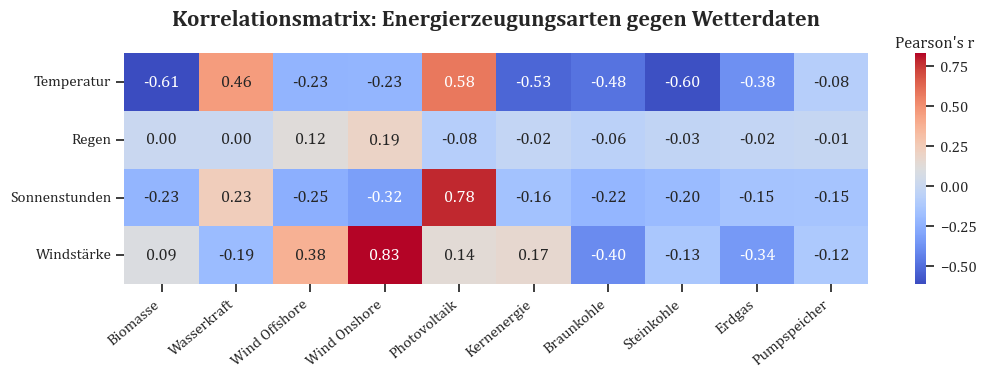

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks", {'axes.grid' : False}) 
plt.rcParams['font.family'] = 'Cambria'

# Select relevant columns from the dataframe
weather_columns = [ 'Temperatur','Regen','Sonnenstunden','Windstärke']
energy_columns = [ 'Biomasse',
 'Wasserkraft',
 'Wind Offshore',
 'Wind Onshore',
 'Photovoltaik',
 'Kernenergie',
 'Braunkohle',
 'Steinkohle',
 'Erdgas',
 'Pumpspeicher',
]

# Create a subset dataframe with only the selected columns
subset_df = MDF_clean_columns[weather_columns + energy_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 3))
heatmap = sns.heatmap(correlation_matrix.loc[weather_columns, energy_columns], annot=True, cmap='coolwarm', fmt=".2f")

cb = heatmap.collections[0].colorbar

cb.set_label(r"Pearson's r", labelpad=-30, rotation=0)
label = cb.ax.yaxis.label
label.set_y(label.get_position()[1] + 0.575)

plt.xticks(rotation=40, ha='right')
plt.yticks(rotation=0, ha='right')
plt.title('Korrelationsmatrix: Energierzeugungsarten gegen Wetterdaten',fontsize=16, fontweight='bold', pad=20)
plt.show()


### Grafik: Korrelationsmatrix: Energieerzeugungsarten gegen Wetterdaten

#### Beschreibung:
Die Korrelationsmatrix zeigt Beziehungen zwischen Energieerzeugungsarten und Wetterparametern. Analysierte Energiequellen: Biomasse, Wasserkraft, Wind Onshore, Wind Offshore, Photovoltaik, Kernenergie, Braunkohle, Steinkohle, Erdgas und Pumpspeicher. Wetterdaten umfassen Temperatur, Regen, Sonnenstunden und Windstärke. Korrelationswerte (Pearson's r) reichen von -0.61 bis 0.83, farblich von Rot (positive Korrelation) über Weiß (keine Korrelation) bis Blau (negative Korrelation).

#### Interpretation:
- **Temperatur**: Die Temperatur hat eine stark negative Korrelation mit der Energieerzeugung aus Biomasse (-0.61) und eine moderate positive mit der Wasserkraft (0.46), was darauf hindeuten könnte, dass höhere Temperaturen mit niedrigerer Biomasseproduktion und höherer Wasserkrafterzeugung einhergehen.
- **Regen**: Regen scheint keine signifikante Korrelation mit den meisten Energiequellen zu haben, außer einer geringen positiven Korrelation mit Wind Onshore (0.19).
- **Sonnenstunden**: Eine starke negative Korrelation (-0.78) mit Kernenergie und eine starke positive Korrelation (0.78) mit Photovoltaik zeigen erwartungsgemäß, dass Sonnenlicht direkt die Photovoltaik beeinflusst, während es umgekehrt mit der Kernenergieproduktion korreliert, die möglicherweise auf veränderte Kühlbedarfsmuster bei starker Sonneneinstrahlung zurückzuführen ist.
- **Windstärke**: Eine sehr starke positive Korrelation (0.83) mit Wind Offshore und moderate positive Korrelationen mit Wind Onshore (0.38) bestätigen, dass Windkraft direkt von der Windstärke abhängt. Eine negative Korrelation mit Erdgas (-0.34) könnte darauf hinweisen, dass bei stärkerem Wind weniger Erdgas zur Stromerzeugung benötigt wird.
- **Arten der Erzeugung**: Speziell bei den konventionellen Energierzeugungsarten erkennt man klar die geringere Sensibilität im Bezug auf das Wetter.


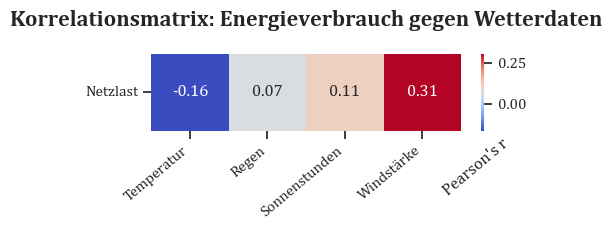

In [132]:
# Select relevant columns from the dataframe
# TODO change Sonnenstunden -> Sonneminuten/Stunden
weather_columns = [ 'Temperatur','Regen','Sonnenstunden','Windstärke']
energy_columns = [
    'Netzlast'
]

# Create a subset dataframe with only the selected columns
subset_df = MDF_clean_columns[weather_columns + energy_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(5, 1))
heatmap = sns.heatmap(correlation_matrix.loc[energy_columns, weather_columns], annot=True, cmap='coolwarm', fmt=".2f")

cb = heatmap.collections[0].colorbar

cb.set_label(r"Pearson's r", labelpad=-40, rotation=40)
label = cb.ax.yaxis.label
label.set_y(label.get_position()[1] - 0.9)

plt.xticks(rotation=40, ha='right')
plt.yticks(rotation=0, ha='right')
plt.title('Korrelationsmatrix: Energieverbrauch gegen Wetterdaten',fontsize=16, fontweight='bold', pad=20)
plt.show()

### Grafik: Korrelationsmatrix: Energieverbrauch gegen Wetterdaten

#### Beschreibung:
Diese Korrelationsmatrix zeigt die Beziehung zwischen dem Energieverbrauch (Netzlast) und verschiedenen Wetterparametern wie Temperatur, Regen, Sonnenstunden und Windstärke. Die Korrelationswerte reichen von -0.16 bis 0.31 und sind farblich von Blau (negative Korrelation) über Beige (neutrale Korrelation) bis Rot (positive Korrelation) dargestellt.

#### Interpretation:
- **Temperatur**: Es besteht eine leichte negative Korrelation (-0.16) zwischen der Temperatur und der Netzlast. Dies könnte darauf hinweisen, dass mit steigender Temperatur der Energieverbrauch tendenziell sinkt, möglicherweise aufgrund geringerer Heizbedarfe oder der Nutzung effizienterer Kühltechnologien.
  
- **Regen**: Der Regen weist nahezu keine Korrelation (0.07) mit der Netzlast auf, was darauf schließen lässt, dass Niederschlag allein keinen signifikanten Einfluss auf den Gesamtenergieverbrauch hat.
  
- **Sonnenstunden**: Die Sonnenstunden zeigen eine sehr geringe positive Korrelation (0.11) mit der Netzlast. Dies könnte bedeuten, dass mehr Sonnenlicht leicht mit einem Anstieg des Energieverbrauchs korreliert, eventuell durch vermehrte Aktivitäten und höheren Betrieb von Klimaanlagen bei sonnigem Wetter.
  
- **Windstärke**: Die stärkste positive Korrelation (0.31) besteht zwischen der Windstärke und der Netzlast. Dies kann darauf hindeuten, dass stärkerer Wind zu einem höheren Energieverbrauch führt, möglicherweise durch erhöhten Einsatz von Heizsystemen in windigen, kühleren Bedingungen oder durch andere windbedingte Einflüsse.

### Schlussfolgerung:
Besonders die Korrelationen mit der Windstärke sowie Temperatur bieten interessante Ansätze für weitere Untersuchungen, insbesondere im Hinblick auf die Planung und Steuerung der Energieversorgung unter Berücksichtigung wetterbedingter Nachfrageschwankungen. 

In [133]:
MasterDataFrame['Zeitstempel'] = pd.to_datetime(MasterDataFrame['Zeitstempel'])

# Set 'Zeitstempel' column as index
MasterDataFrame.set_index('Zeitstempel', inplace=True)

electricity_cols = ['Netzlast [MWh]', 'Biomasse [MWh]', 'Wasserkraft [MWh]', 'Wind Offshore [MWh]', 'Wind Onshore [MWh]', 'Photovoltaik [MWh]', 'Sonstige Erneuerbare [MWh]', 'Kernenergie [MWh]', 'Braunkohle [MWh]', 'Steinkohle [MWh]', 'Erdgas [MWh]', 'Pumpspeicher [MWh]', 'Sonstige Konventionelle [MWh]']
df_electricity = MasterDataFrame[electricity_cols].resample('D').sum()

# Resample to daily frequency and apply mean for weather data
weather_cols = ['Temp [°C]', 'Rain [mm]', 'Sunshine [min]', 'Wind [m/s]']
df_weather = MasterDataFrame[weather_cols].resample('D').mean()

# Concatenate the two DataFrames
MasterDataFrame_daily = pd.concat([df_electricity, df_weather], axis=1)

# Reset index to have 'Zeitstempel' as a column again
MasterDataFrame_daily.reset_index(inplace=True)
MasterDataFrame.reset_index(inplace=True)

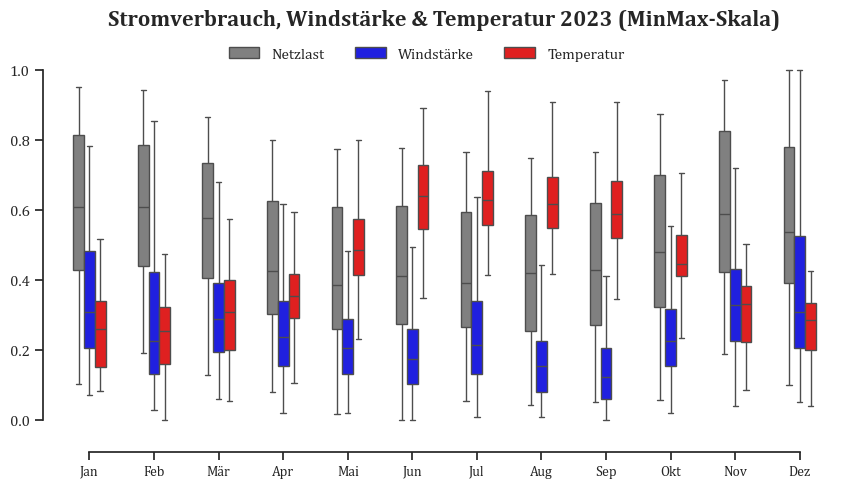

In [134]:
MDF_forboxplot_2 = MasterDataFrame[:-1][["Zeitstempel","Netzlast [MWh]","Wind [m/s]","Temp [°C]"]].copy()
MDF_forboxplot_2.rename(columns={"Netzlast [MWh]": "Netzlast","Wind [m/s]": "Windstärke","Temp [°C]": "Temperatur"}, inplace=True)
german_months = ["Januar", "Februar", "März", "April", "Mai", "Juni","Juli", "August", "September", "Oktober", "November", "Dezember"]

MDF_forboxplot_2['Month'] = MDF_forboxplot_2['Zeitstempel'].dt.month.map(lambda x: german_months[x-1][:3])

MDF_forboxplot_2['Netzlast'] = (MDF_forboxplot_2['Netzlast'] - MDF_forboxplot_2['Netzlast'].min()) / (MDF_forboxplot_2['Netzlast'].max() - MDF_forboxplot_2['Netzlast'].min())
MDF_forboxplot_2['Windstärke'] = (MDF_forboxplot_2['Windstärke'] - MDF_forboxplot_2['Windstärke'].min()) / (MDF_forboxplot_2['Windstärke'].max() - MDF_forboxplot_2['Windstärke'].min())
MDF_forboxplot_2['Temperatur'] = (MDF_forboxplot_2['Temperatur'] - MDF_forboxplot_2['Temperatur'].min()) / (MDF_forboxplot_2['Temperatur'].max() - MDF_forboxplot_2['Temperatur'].min())
melted_df_2 = MDF_forboxplot_2.melt(id_vars=['Zeitstempel', 'Month'], var_name='Parameter', value_name='Value')



# Suppose modern color schemes/styles
plt.figure(figsize=(10, 5))

# Draw a nested boxplot to show the distribution of 'Value' by 'Month' and 'Parameter'
sns.boxplot(x="Month", y="Value",
            hue="Parameter",
            palette=["grey", "blue", "red"],
            data=melted_df_2,
            showfliers=False,
            width=0.5)
sns.despine(offset=10, trim=True)
plt.subplots_adjust(wspace=0.5)

plt.xticks(ha='center', fontsize=10)
plt.legend(ncol=3, frameon=False, bbox_to_anchor=(0.75, 1.05))
plt.ylabel("")
plt.xlabel("")

plt.title("Stromverbrauch, Windstärke & Temperatur 2023 (MinMax-Skala)",fontsize=16, fontweight='bold',pad=20)
plt.show()


### Grafik: Stromverbrauch, Windstärke & Temperatur 2023 (MinMax-Skala)

#### Beschreibung:
Diese Boxplot-Grafik zeigt die monatlichen Verteilungen von Stromverbrauch (Netzlast), Windstärke und Temperatur für das Jahr 2023, alle normalisiert auf einer MinMax-Skala von 0 bis 1. Die Netzlast ist in Grau dargestellt, Windstärke in Blau und Temperatur in Rot. Jeder Boxplot zeigt das mittlere 50%-Intervall (die Box), den Median (die Linie innerhalb der Box) und die Variabilität (die "Whiskers" oder Linien, die von der Box ausgehen).

#### Interpretation:
- **Netzlast**: Die Netzlast zeigt über das Jahr hinweg eine hohe Variabilität, mit Peaks, die sich besonders in den Wintermonaten (Januar, Februar) und einem leichten Anstieg im Sommer (Juli, August) bemerkbar machen. Dies spiegelt typischerweise den erhöhten Energiebedarf im Winter für Heizung und im Sommer für Kühlung wider.

- **Windstärke**: Die Windstärke variiert ebenfalls über das Jahr, mit den höchsten Werten im Winter und Frühling, was für diese Jahreszeiten typisch ist. Die Peaks im Februar und März könnten auf stürmische Wetterbedingungen hinweisen, die in diesen Monaten häufig auftreten.

- **Temperatur**: Die Temperatur zeigt eine klare saisonale Tendenz mit den niedrigsten Werten im Winter und den höchsten im Sommer. Die hohen Werte im Juli und August korrespondieren mit den Sommermonaten, was typische höhere Temperaturen und potenzielle Hitzewellen widerspiegelt.

In [135]:
MDF_forboxplot = MasterDataFrame[:-1][["Zeitstempel","Netzlast [MWh]","Temp [°C]"]].copy()
MDF_forboxplot.rename(columns={"Netzlast [MWh]": "Netzlast","Temp [°C]": "Temperatur"}, inplace=True)
german_months = [
    "Januar", "Februar", "März", "April", "Mai", "Juni",
    "Juli", "August", "September", "Oktober", "November", "Dezember"
]

MDF_forboxplot['Month'] = MDF_forboxplot['Zeitstempel'].dt.month.map(lambda x: german_months[x-1][:3])

MDF_forboxplot['Netzlast'] = (MDF_forboxplot['Netzlast'] - MDF_forboxplot['Netzlast'].min()) / (MDF_forboxplot['Netzlast'].max() - MDF_forboxplot['Netzlast'].min())
MDF_forboxplot['Temperatur'] = (MDF_forboxplot['Temperatur'] - MDF_forboxplot['Temperatur'].min()) / (MDF_forboxplot['Temperatur'].max() - MDF_forboxplot['Temperatur'].min())
melted_df = MDF_forboxplot.melt(id_vars=['Zeitstempel', 'Month'], var_name='Parameter', value_name='Value')

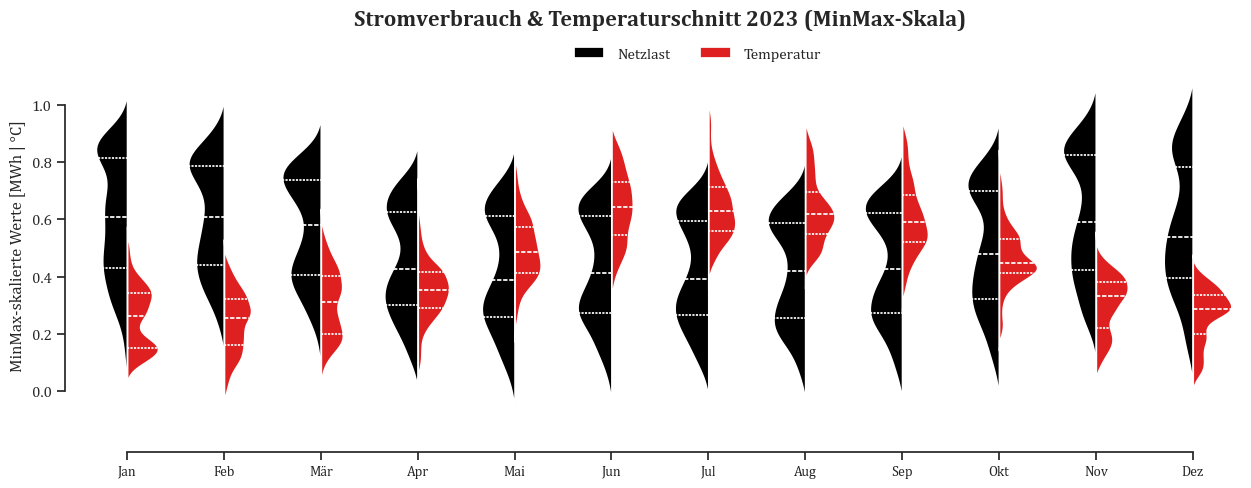

In [136]:
# Suppose modern color schemes/styles
plt.figure(figsize=(15, 5))

# Draw a nested violin plot to show the distribution of 'Value' by 'Month' and 'Parameter'
sns.violinplot(x="Month", y="Value",
               hue="Parameter",
               palette=["black", "red"],
               data=melted_df, split=True, inner="quartile",edgecolor="white")
sns.despine(offset=10, trim=True)

# Angle the xticklabels by 30°
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.legend(ncol=3, frameon=False, bbox_to_anchor=(0.65, 1.05))
plt.ylabel("MinMax-skalierte Werte [MWh | °C]")
plt.xlabel("")


plt.title("Stromverbrauch & Temperaturschnitt 2023 (MinMax-Skala)",fontsize=16, fontweight='bold',pad=20)
plt.show()

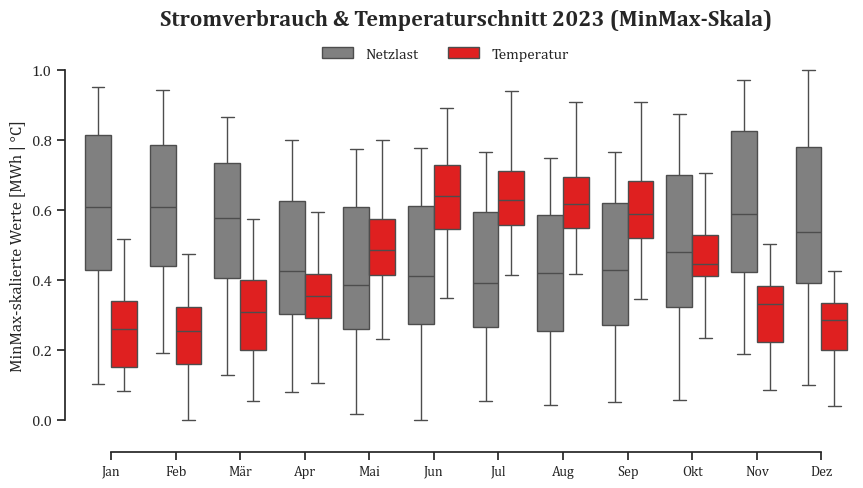

In [137]:
plt.figure(figsize=(10, 5))

# Draw a nested boxplot to show the distribution of 'Value' by 'Month' and 'Parameter'
sns.boxplot(x="Month", y="Value",
            hue="Parameter",
            palette=["grey", "red"],
            data=melted_df,
            showfliers=False)
sns.despine(offset=10, trim=True)

# Angle the xticklabels by 30°
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.legend(ncol=3, frameon=False, bbox_to_anchor=(0.65, 1.05))
plt.ylabel("MinMax-skalierte Werte [MWh | °C]")
plt.xlabel("")

plt.title("Stromverbrauch & Temperaturschnitt 2023 (MinMax-Skala)",fontsize=16, fontweight='bold',pad=20)
plt.show()


### Grafik: Stromverbrauch & Temperaturschnitt 2023 (MinMax-Skala)

#### Beschreibung:
Der **Violinplot** visualisiert den Stromverbrauch (Netzlast) und die Durchschnittstemperatur für das Jahr 2023. Der Stromverbrauch ist in Schwarz und die Temperatur in Rot dargestellt, wobei die Breite der Flächen die Verteilung innerhalb des jeweiligen Monats zeigt. Die gestrichelte Linie in jeder "Fläche" repräsentiert den Median des jeweiligen Datensatzes.

Die **Boxplot-Grafik** stellt ebenfalls den o.g. Zusammenhang aus Stromverbrauch und Durchschnittstemperatur dar. Die Netzlast ist in Grau und die Temperatur in Rot abgebildet. Jeder Boxplot zeigt die Verteilung der monatlichen Daten mit Quartilen und Ausreißern.

Für beide Plots wurden die Daten vorher skaliert, d.h. auf eine MinMax-Skala von 0 bis 1 um diese in einer Grafik vergleichbar zu machen.

Wir haben uns entschieden, sowohl Violinplot als auch Boxplot darzustellen. Der Violinplot visualisiert exzellent die beiden Peaks im Bezug auf die Netzlast, während der Boxplot übersichtlicher die allgemeinen Trends veranschaulicht.

#### Interpretation:
- **Allgemeine Trends**: Die Grafik zeigt deutlich die saisonalen Schwankungen in beiden Parametern..
  - *Netzlast*: Höhere Werte im Winter (Januar, Februar, Dezember) weisen auf einen erhöhten Heizbedarf hin. Der Stromverbrauch scheint im Sommer etwas abzunehmen, bleibt jedoch relativ hoch, was auf den Einsatz von Klimaanlagen während heißer Tage hindeuten könnte.
  - *Temperatur*: Die niedrigsten Temperaturen werden im Januar und Februar verzeichnet, mit einer deutlichen Erwärmung in den folgenden Monaten und Spitzenwerten im Juli und August.

- **Wechselbeziehung**: Die gegenläufigen Muster zwischen Stromverbrauch und Temperatur illustrieren typische saisonale Energieverbrauchstrends. Höhere Temperaturen im Sommer führen zu niedrigerem Heizbedarf, während im Winter der Heizbedarf und damit der Stromverbrauch steigen.

- **Temperatur**: Die roten Flächen, die die Temperatur darstellen, zeigen deutlich, dass die höchsten Temperaturen in den Monaten Juni bis August auftreten, was auf eine erhöhte Nutzung von Klimaanlagen und damit verbundenen Anstieg des Stromverbrauchs in diesen Monaten hindeuten könnte.

- **Ungleichheit bei Violinplot**: Nur im Violinplot fällt auf, dass die Netzlast zwischen zwei Werten hin- und herschwankt. Dies ist auf die Tag-Nacht-Ungleichheit zurückzuführen. Speziell im Sommer ist diese stärker als im Winter ausgeprägt.
  - Im Sommer steigt der Energiebedarf tagsüber oft signifikant an, vor allem durch die verstärkte Nutzung von Klimaanlagen und Kühlgeräten sowie durch erhöhte Aktivitäten in Freizeit und Tourismus. Dies führt zu Spitzen in der Netzlast während der Tagesstunden.

### Schlussfolgerung:
Diese Grafik bietet eine Darstellung der Beziehung zwischen Stromverbrauch und Temperatur über das Jahr. Sie zeigt, wie eng diese beiden Parameter miteinander verbunden sind und wie stark sie von saisonalen Schwankungen beeinflusst werden. Die Wechselbeziehung zwischen Temperatur und Stromverbrauch wird hier klar dargelegt und zeigt, dass der Energiebedarf nicht nur durch kalte, sondern auch durch heiße Temperaturen getrieben wird. 


In [138]:
temperatures_with_weatherstations = separate_dfs[0].copy()
wind_with_weatherstations = separate_dfs[3].copy()
temperatures_with_weatherstations = temperatures_with_weatherstations.pivot(index='Zeitstempel', columns='SDO_ID', values='Temp [°C]')
wind_with_weatherstations = wind_with_weatherstations.pivot(index='Zeitstempel', columns='SDO_ID', values='Wind [m/s]')

# Reset index to make Zeitstempel a column again
temperatures_with_weatherstations.reset_index(inplace=True)
wind_with_weatherstations.reset_index(inplace=True)

# Assuming 'Zeitstempel' is a datetime column in your DataFrame
# First, ensure 'Zeitstempel' is in datetime format
temperatures_with_weatherstations['Zeitstempel'] = pd.to_datetime(temperatures_with_weatherstations['Zeitstempel'])
wind_with_weatherstations['Zeitstempel'] = pd.to_datetime(wind_with_weatherstations['Zeitstempel'])

# Group by the date part of 'Zeitstempel' and calculate the mean for each group
daily_temperatures = temperatures_with_weatherstations.groupby(temperatures_with_weatherstations['Zeitstempel'].dt.date).mean()

# Reset the index to make 'Zeitstempel' a column again
# Now, 'daily_temperatures' contains daily mean temperatures
daily_temperatures.drop(columns="Zeitstempel",inplace=True)

daily_temperatures.reset_index(inplace=True)

temperatures_with_weatherstations.set_index('Zeitstempel', inplace=True)
wind_with_weatherstations.set_index('Zeitstempel', inplace=True)
daily_temperatures.set_index('Zeitstempel', inplace=True)


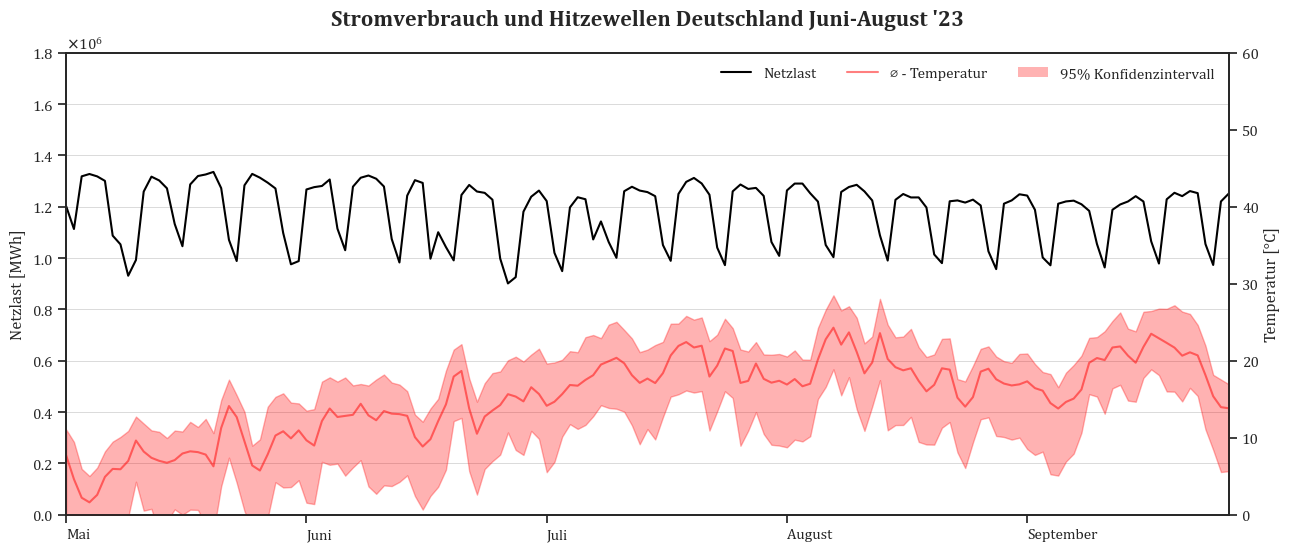

In [139]:
from matplotlib.patches import Patch
from matplotlib.ticker import ScalarFormatter

start, end = 90, 241

fig, ax1 = plt.subplots(figsize=(15, 6))

sns.lineplot(data=MasterDataFrame_daily[start:end], x='Zeitstempel', y='Netzlast [MWh]', color='black',label='Netzlast', alpha=1, ax=ax1)

ax1.set_ylim(0, 1_800_000)

# Calculate the mean and 95% confidence interval for each day
daily_mean = daily_temperatures[start:end].mean(axis=1)
daily_ci = daily_temperatures[start:end].quantile([0, 1], axis=1)

ax2 = ax1.twinx()
sns.lineplot(data=daily_mean, label='⌀ - Temperatur', color='red', alpha=0.5, markers="o",ax=ax2)
ax2.fill_between(daily_mean.index, daily_ci.loc[0], daily_ci.loc[1], color='red', alpha=0.3)
ax2.set_ylim(0, 60)
ax2.set_ylabel('Temperatur [°C]')

# Create legend with custom legend entries ixing the legend !!!!!
legend_elements = [Patch(facecolor='red', alpha=0.3, edgecolor='none', label='95% Confidence Interval')]
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
all_handles = lines1 + lines2 + legend_elements
all_labels = labels1 + labels2 + ['95% Konfidenzintervall']

ax2.get_legend().remove()

ax1.legend(all_handles, all_labels, loc='upper right', ncol=len(all_handles), frameon=False)

# Numbers
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  # Adjust limits as needed
ax1.yaxis.set_major_formatter(formatter)

months = [timestamp.month for timestamp in MasterDataFrame_daily[start:end]['Zeitstempel']]
selected_months = [month for i, month in enumerate(months) if i % 31 == 0]
selected_timestamps = MasterDataFrame_daily[start:end]['Zeitstempel'][::31]
ax1.set_xticks(selected_timestamps)
ax1.set_xticklabels([f'{german_months[m]}' for i,m in enumerate(selected_months)], rotation=0, ha='left')
ax1.grid(axis='y', linestyle='-', linewidth=0.5, color='black', alpha=0.2)
ax1.set_xlabel("")
plt.xlim(MasterDataFrame_daily[start:end].iloc[0]['Zeitstempel'], MasterDataFrame_daily[start:end].iloc[-1]['Zeitstempel'])
plt.title("Stromverbrauch und Hitzewellen Deutschland Juni-August '23",fontsize=16, fontweight='bold',pad=20)
plt.show()

### Grafik: Stromverbrauch und Hitzewellen Juni-August '23

#### Beschreibung:
Diese Grafik veranschaulicht den Stromverbrauch (Netzlast) und die Durchschnittstemperatur während der Sommermonate Juni bis August 2023. Die Netzlast ist durch eine schwarze Linie repräsentiert und auf der linken Y-Achse in Megawattstunden (MWh) dargestellt. Die Durchschnittstemperatur wird durch eine rote Linie mit einem 95% Konfidenzintervall in Rosa angezeigt, wobei die Temperaturwerte auf der rechten Y-Achse in Grad Celsius (°C) aufgetragen sind.

#### Interpretation:
- **Temperaturverlauf**: Die Temperatur zeigt im betrachteten Zeitraum eine wellenförmige Bewegung mit Spitzen, die durch rote Dreiecke markiert sind. Diese Spitzen stellen wahrscheinlich Hitzewellen dar, während derer die Temperaturen besonders hoch waren.

- **Netzlast**: Die Netzlast zeigt ebenfalls eine wellenförmige Bewegung, die jedoch im Vergleich zur Temperatur eine gegenläufige Tendenz aufweist. Es scheint, dass die Spitzen im Stromverbrauch etwas verzögert nach den Temperaturspitzen auftreten, was darauf hindeuten könnte, dass der erhöhte Stromverbrauch eine Reaktion auf die gestiegenen Temperaturen ist, insbesondere durch die Nutzung von Klimaanlagen und anderen Kühlgeräten.

- **Korrelation zwischen Temperatur und Netzlast**: Während der Hitzewellen steigt die Temperatur deutlich an, was jedoch kaum mit einem Anstieg des Stromverbrauchs korreliert. Ungeachtet von Temperaturpeaks sind die "Wochenzyklen" des Stromverbrauchs relativ konstant.

### Schlussfolgerung:
Nach dieser Grafik scheint es keinen Zusammenhang zwischen Hitzepeaks und erheblicher Änderung des Stromverbrauchs zu geben. Wir werden also die Granularität der Daten etwas weiter erhöhen und uns die Werte auf Stundenbasis anschauen.


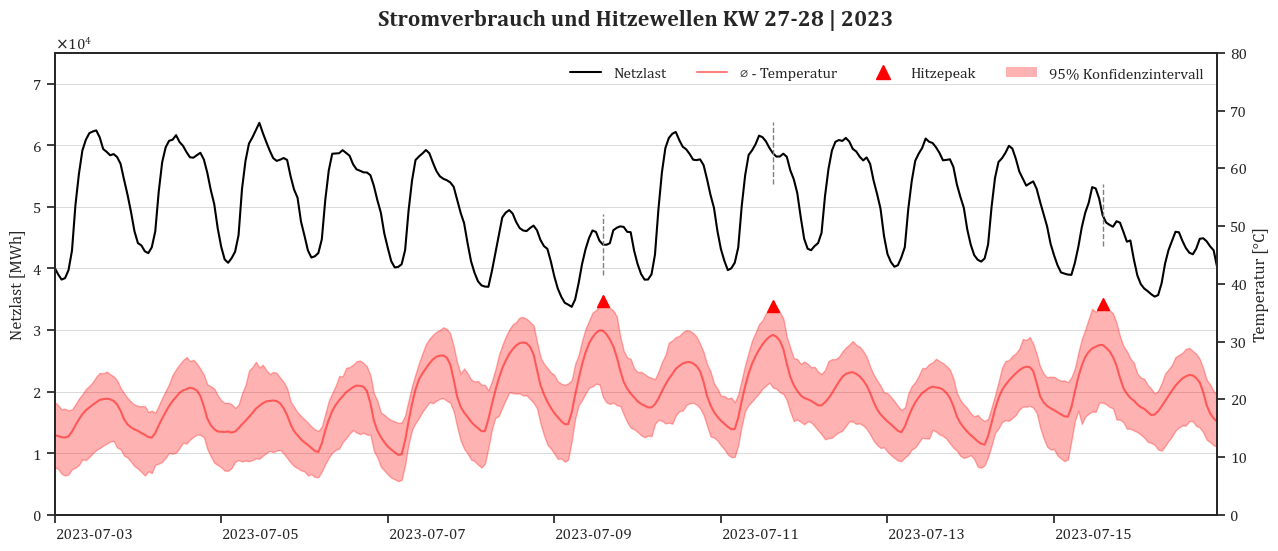

In [140]:
start, end = (6*31-3)*24, (6*31-3)*24+14*24

fig, ax1 = plt.subplots(figsize=(15, 6))
sns.lineplot(data=MasterDataFrame[start:end], x='Zeitstempel', y='Netzlast [MWh]', color='black', label='Netzlast', alpha=1, ax=ax1)
ax1.set_ylim(0, 75000)

daily_mean = temperatures_with_weatherstations[start:end].mean(axis=1)
daily_ci = temperatures_with_weatherstations[start:end].quantile([0.005, 0.995], axis=1)

ax2 = ax1.twinx()
sns.lineplot(data=daily_mean, label='⌀ - Temperatur', color='red', alpha=0.5, markers="o",ax=ax2)
ax2.fill_between(daily_mean.index, daily_ci.loc[0.005], daily_ci.loc[0.995], color='red', alpha=0.3)
ax2.set_ylim(0, 80)
ax2.set_ylabel('Temperatur [°C]')

# Create legend with custom legend entries ixing the legend 
legend_elements = [
    Patch(facecolor='red', alpha=0.3, edgecolor='none'),
    plt.plot([], [], color='red', marker='^', markersize=10, linewidth=0, label='Hitzepeak')[0]
    ]
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
all_handles = lines1 + lines2 + legend_elements
all_labels = labels1 + labels2 + ['95% Konfidenzintervall']
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(all_handles, all_labels, loc='upper right', ncol=len(all_handles), frameon=False)

# Numbers handling
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  # Adjust limits as needed
ax1.yaxis.set_major_formatter(formatter)

# Find peaks in upper confidence interval exceeding 30 and annotate with red triangles
t_w = int(3*24) # time window for heat waves
for i in range(len(daily_ci.columns)):
    if i != 0 and daily_ci.iloc[1, i] > 28 and daily_ci.iloc[1, i] == max(daily_ci.iloc[1].to_list()[int(max(0, i - (t_w/2))):int(min(len(daily_ci.columns) - 1, i + (t_w/2))) + 1]) and i != 303:
        ax2.plot(daily_mean.index[i], daily_ci.iloc[1, i], marker='^', markersize=daily_ci.iloc[1, i]/4, color='red')
        # grey vertical lines
        marker_y_max_ax1 = MasterDataFrame[start:end].iloc[i, 1] + 5000
        marker_y_min_ax1 = MasterDataFrame[start:end].iloc[i, 1] - 5000
        ymax_ax1 = (marker_y_max_ax1 - ax1.get_ylim()[0]) / (ax1.get_ylim()[1] - ax1.get_ylim()[0])
        ymin_ax1 = (marker_y_min_ax1 - ax1.get_ylim()[0]) / (ax1.get_ylim()[1] - ax1.get_ylim()[0])
        ax2.axvline(x=daily_mean.index[i], color='grey', linestyle='--', linewidth=1, ymax=ymax_ax1, ymin = ymin_ax1)

ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='left')
ax1.set_xlabel("")
ax1.grid(axis='y', linestyle='-', linewidth=0.5, color='black', alpha=0.2)

plt.xlim(MasterDataFrame[start:end].iloc[0]['Zeitstempel'], MasterDataFrame[start:end].iloc[-1]['Zeitstempel'])
plt.title("Stromverbrauch und Hitzewellen KW 27-28 | 2023",fontsize=16, fontweight='bold',pad=20)
plt.show()

### Grafik: Stromverbrauch und Hitzewellen Juni-August '23

#### Beschreibung:
Diese Grafik veranschaulicht den Stromverbrauch (Netzlast) und die Durchschnittstemperatur während der Sommermonate Juni bis August 2023. Die Netzlast ist durch eine schwarze Linie repräsentiert und auf der linken Y-Achse in Megawatt (MW) dargestellt. Die Durchschnittstemperatur wird durch eine rote Linie mit einem 95% Konfidenzintervall in Rosa angezeigt, wobei die Temperaturwerte auf der rechten Y-Achse in Grad Celsius (°C) aufgetragen sind.

*Die Methode .quantile([0.025, 0.975], axis=1) wird verwendet, um die Quantile entlang der Achse 1 des DataFrame zu berechnen, also entlang der Spalten. Konkret werden damit für jede Zeile die 2,5- und 97,5-Perzentile berechnet, die den unteren und oberen Grenzen eines 95%-Konfidenzintervalls entsprechen.*

#### Interpretation:
- **Temperaturverlauf**: Die Temperatur zeigt im betrachteten Zeitraum eine wellenförmige Bewegung mit Spitzen, die durch rote Dreiecke markiert sind. Diese Spitzen stellen  Hitzewellen dar, während derer die Temperaturen besonders hoch (>28°C) waren.

- **Netzlast**: Die Netzlast zeigt ebenfalls eine wellenförmige Bewegung, die jedoch im Vergleich zur Temperatur eine gegenläufige Tendenz aufweist. Es scheint, dass die (kleinen, wenn auch vorhandenen) Spitzen im Stromverbrauch etwas verzögert nach den Temperaturspitzen auftreten, was darauf hindeuten könnte, dass der erhöhte Stromverbrauch eine Reaktion auf die gestiegenen Temperaturen ist, insbesondere durch die Nutzung von Klimaanlagen und anderen Kühlgeräten.

- **Unterschiede Wochentage und -ende**: Interessante Nebenerkenntnis, wenn auch nicht Fokus der Untersuchung sind die erheblichen Unterschiede zwischen Wochentagen und den Wochenenden. Hieran ist auch erkenntlich, dass wahrscheinlich berufs- und industriegebundener Energiebedarf maßgeblicher Faktor bei den Schwankungen in der Energienachfrage ist. 

### Schlussfolgerung:
Die zeitliche Verzögerung zwischen Temperaturanstiegen und Spitzen im Stromverbrauch könnte auf die thermische Trägheit von Gebäuden und die darauffolgende verstärkte Nutzung von Klimatisierungssystemen zurückzuführen sein. Diese Daten sind für Energieversorger und Netzwerkbetreiber besonders wichtig, da sie eine präzise Planung und Bereitstellung von Ressourcen während erwarteter Hitzewellen ermöglichen. Dies ist entscheidend, um eine zuverlässige Stromversorgung während Perioden extremer Temperaturen sicherzustellen.

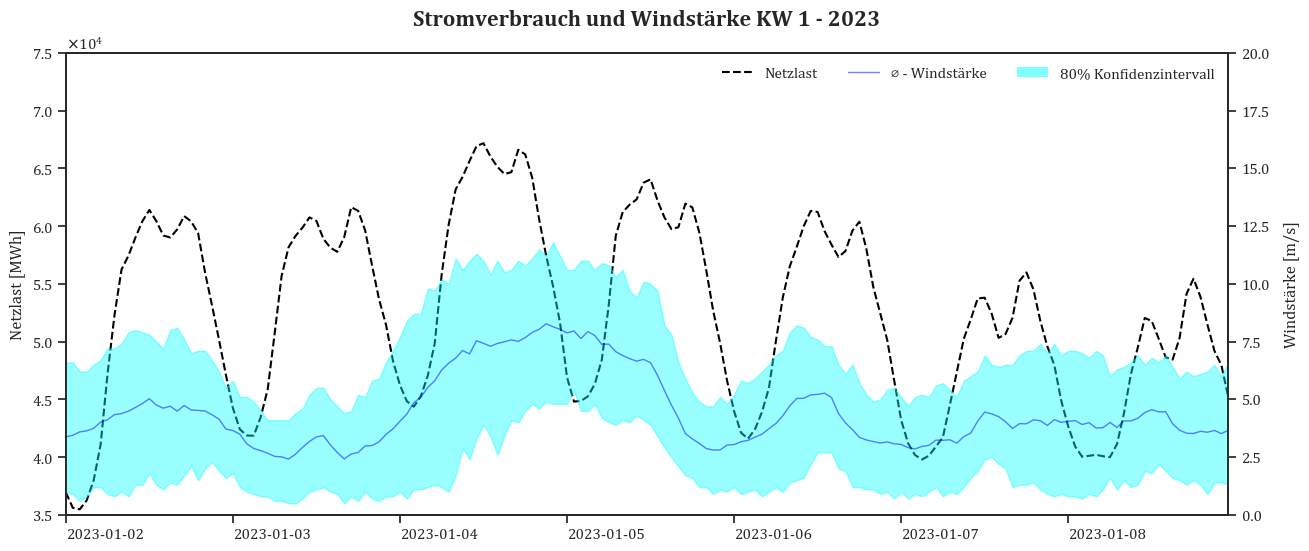

In [141]:
start, end = 1*24, 8*24

fig, ax1 = plt.subplots(figsize=(15, 6))
sns.lineplot(data=MasterDataFrame[start:end], x='Zeitstempel', y='Netzlast [MWh]', color='black',linestyle="--",label='Netzlast', alpha=1, ax=ax1)
ax1.set_ylim(35000, 75000)

daily_mean = wind_with_weatherstations[start:end].mean(axis=1)
daily_ci = wind_with_weatherstations[start:end].quantile([0.1, 0.9], axis=1)

ax2 = ax1.twinx()
sns.lineplot(data=daily_mean, label='⌀ - Windstärke', color='blue', alpha=0.5, markers="o", ax=ax2, linewidth=1)
ax2.fill_between(daily_mean.index, daily_ci.loc[0.1], daily_ci.loc[0.9], color='cyan', alpha=0.4)
ax2.set_ylim(0, 20)

legend_elements = [
    Patch(facecolor='cyan', alpha=0.5, edgecolor='none'),
    ]
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
all_handles = lines1 + lines2 + legend_elements
all_labels = labels1 + labels2 + ['80% Konfidenzintervall']
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(all_handles, all_labels, loc='upper right', ncol=len(all_handles), frameon=False)
ax2.set_ylabel('Windstärke [m/s]', labelpad=10)

# Numbers handling
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  # Adjust limits as needed
ax1.yaxis.set_major_formatter(formatter)

ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='left')
ax1.set_xlabel("")

plt.xlim(MasterDataFrame[start:end].iloc[0]['Zeitstempel'], MasterDataFrame[start:end].iloc[-1]['Zeitstempel'])
plt.title("Stromverbrauch und Windstärke KW 1 - 2023",fontsize=16, fontweight='bold',pad=20)
plt.show()



### Grafik: Stromverbrauch und Windstärke KW 1 - 2023

#### Beschreibung:
Die Grafik zeigt den Stromverbrauch (Netzlast) und die Windstärke in der ersten Kalenderwoche des Jahres 2023. Diese wurde gewählt, da Dezember-Februar generell die windigsten Monate sind. Die Netzlast ist als schwarze gestrichelte Linie dargestellt und auf der linken Y-Achse in Megawatt (MW) skaliert. Die Windstärke wird durch eine blaue Linie angezeigt, wobei das 80% Konfidenzintervall durch eine hellblaue Färbung markiert ist. Die Skala der Windstärke ist auf der rechten Y-Achse in Metern pro Sekunde (m/s) angegeben.

#### Interpretation:
- **Windstärke**: Die Windstärke zeigt im betrachteten Zeitraum eine variierende Tendenz mit Werten, die zwischen etwa 5 m/s und etwas über 15 m/s schwanken.

- **Zusammenhang zwischen Windstärke und Netzlast**: Die positive Korrelation zwischen der Windstärke und der Netzlast wird hier deutlich. Zunahme der Windstärke führt zu erhöhter Windenergieproduktion, was die Einspeisung von Windenergie ins Netz erhöht. Mögliche Gründe könnten sein:
  - Verstärkte Nutzung von Elektroheizungen und Aufenthalt im Wohnraum
  - Industriezweige wie z.B. Metallverarbeitung oder chemische Produktion, könnte bei starkem Wind kurzfristig die Produktion erhöht werden um von günstigen Energiepreisen und einem stabilen Netz zu profitieren
  - Eine Zunahme des Verkehrs und Nutzung von Infrastruktur allgemein


### Schlussfolgerung:
Diese Grafik zeigt das Zusammenspiel zwischen Windenergieerzeugung und Stromverbrauch. Insbesondere zeigt sie, wie variierende Windstärken potenziell den Bedarf an Strom aus konventionellen Quellen beeinflussen können, insbesondere während Zeiten, in denen Windenergie eine signifikante Rolle in der Energieversorgung spielt. Die Beeinflussung ist jedoch eher von mittelfristiger Natur, d.h. Spitzen in der Windstärke beeinflussen die Netzlast kaum, während stärkerer Wind über mehrere Tage in Korrelation mit erhöhter Netzlast steht.

## Zusatz: wie schnell steigt die Stromerzeugung bei sich erhöhender Windstärke?


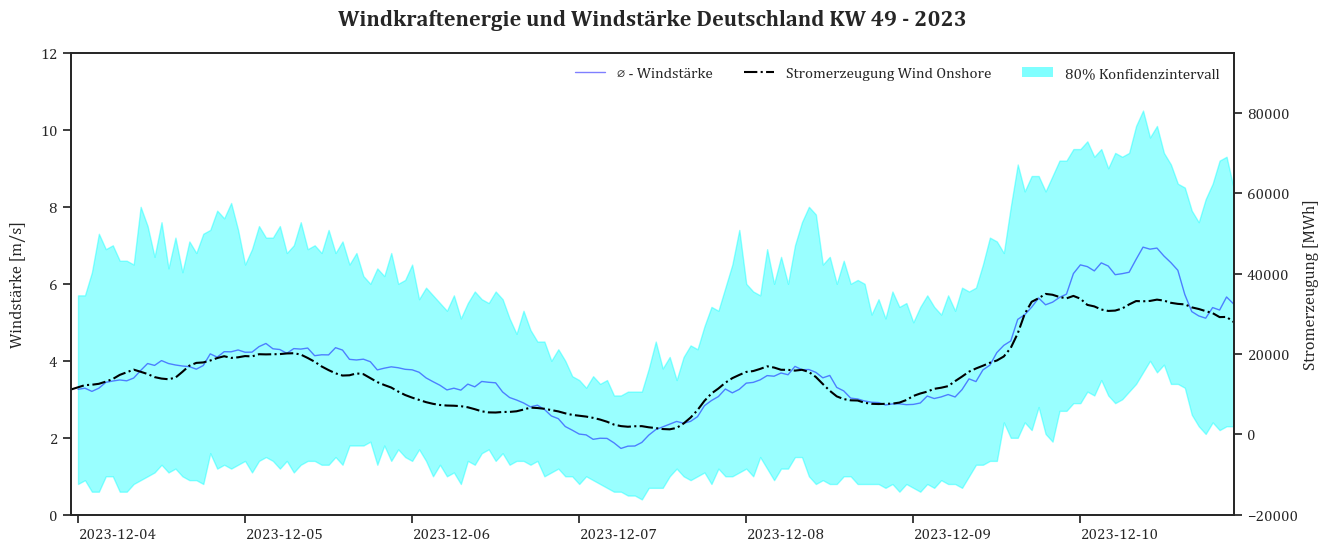

In [142]:
start, end = 30*11*24 + 24*7 , 30*11*24 + 24*14 

fig, ax1 = plt.subplots(figsize=(15, 6))
daily_mean = wind_with_weatherstations[start:end].mean(axis=1)
daily_ci = wind_with_weatherstations[start:end].quantile([0.1, 0.9], axis=1)

sns.lineplot(data=daily_mean, label='⌀ - Windstärke', color='blue', alpha=0.5, markers="o", ax=ax1, linewidth=1)
ax1.fill_between(daily_mean.index, daily_ci.loc[0.1], daily_ci.loc[0.9], color='cyan', alpha=0.4)
ax1.set_ylim(0, 12)
ax2 = ax1.twinx()

sns.lineplot(data=MasterDataFrame[start:end], x='Zeitstempel', y='Wind Onshore [MWh]', color='black',linestyle='dashdot',label='Stromerzeugung Wind Onshore', alpha=1, ax=ax2)
ax2.set_ylim(-20000, 95000)

legend_elements = [
    Patch(facecolor='cyan', alpha=0.5, edgecolor='none'),
    ]
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
all_handles = lines1 + lines2 + legend_elements
all_labels = labels1 + labels2 + ['80% Konfidenzintervall']
ax2.get_legend().remove()
ax1.get_legend().remove()
ax2.legend(all_handles, all_labels, loc='upper right', ncol=len(all_handles), frameon=False)
ax1.set_ylabel('Windstärke [m/s]', labelpad=10)

# Numbers handling
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  # Adjust limits as needed
ax1.yaxis.set_major_formatter(formatter)

ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='left')
ax1.set_ylabel('Windstärke [m/s]', labelpad=10)
ax2.set_ylabel("Stromerzeugung [MWh]")
ax1.set_xlabel("")
plt.xlim(MasterDataFrame[start:end].iloc[0]['Zeitstempel'], MasterDataFrame[start:end].iloc[-1]['Zeitstempel'])
plt.title("Windkraftenergie und Windstärke Deutschland KW 49 - 2023",fontsize=16, fontweight='bold',pad=20)
plt.show()

### Grafik: Windkraftenergie und Windstärke Deutschland KW 49 - 2023

#### Beschreibung:
Diese Grafik stellt die Beziehung zwischen der Windstärke und der Stromerzeugung durch Windkraft Onshore in Deutschland für die Kalenderwoche 49 des Jahres 2023 dar. Die Windstärke ist durch eine blaue Linie dargestellt und das 80% Konfidenzintervall durch eine hellblaue Fläche gekennzeichnet. Die Windkraftstromerzeugung wird durch eine gestrichelte schwarze Linie repräsentiert, wobei die Skalierung der Windkraftenergie auf der rechten Y-Achse in Megawatt (MW) angegeben ist und die Windstärke auf der linken Y-Achse in Metern pro Sekunde (m/s).

#### Interpretation:
- **Windstärke**: Die Windstärke zeigt im betrachteten Zeitraum deutliche Schwankungen mit Spitzen, die bis über 10 m/s reichen. Das 80% Konfidenzintervall verdeutlicht, dass die Messungen eine gewisse Unsicherheit aufweisen, was in der natürlichen Variabilität von Windgeschwindigkeiten begründet liegt.

- **Stromerzeugung**: Die Stromerzeugung durch Windkraft folgt generell der Windstärke, was auf die direkte Abhängigkeit der Windenergieproduktion von der Windgeschwindigkeit hinweist. Höhere Windgeschwindigkeiten führen zu einer Zunahme der Energieerzeugung, was besonders in den Spitzenzeiten der Windstärke ersichtlich ist.

- **Korrelation zwischen Windstärke und Stromerzeugung**: Es gibt eine klare positive Korrelation zwischen der Windstärke und der Energieerzeugung durch Windkraft. Die gestrichelte Linie der Energieerzeugung steigt und fällt in Übereinstimmung mit den Anstiegen und Abnahmen der Windstärke.

### Schlussfolgerung:
Die Einspeisung der Energie erfolgt nahezu unmittelbar. 

## Beantwortung der Fragestellungen
### Einfluss von Regenwetter auf den Stromverbrauch

Regenwetter kann potenziell zu einer Erhöhung des Stromverbrauchs führen, da Menschen bei schlechtem Wetter eher dazu neigen, zu Hause zu bleiben. Dies könnte zu einem erhöhten Gebrauch von elektrischen Geräten, Beleuchtung und anderen Haushaltsgeräten führen. Allerdings wurde in den analysierten Daten kein direkter signifikanter Anstieg des Stromverbrauchs während Regentagen festgestellt. Dies könnte darauf hinweisen, dass der Einfluss von Regen auf das Verhalten der Menschen nicht stark genug ist, um messbare Auswirkungen auf den nationalen Stromverbrauch zu haben, oder dass die vorhandenen Daten nicht ausreichen, um solche Effekte zu isolieren. Natürlich kann es auch an mangelnder Datenqualität oder falscher Auswertungsmethoden liegen.

### Einfluss von Hitzewellen auf den Stromverbrauch

Nur auf stündlicher Basis sind Zusammenhänge zwischen einem Temperaturpeak tagsüber und dem Energieverbrauch zu erkennen. Diese machen sich in Form einer kleinen Spitze in der Netzlast bemerkbar.

### Korrelation zwischen Wetter und Stromerzeugung

Die Korrelation zwischen Wetterbedingungen und verschiedenen Arten der Stromerzeugung ist ebenfalls ein wichtiger Aspekt. Insbesondere erneuerbare Energiequellen wie Wind- und Solarenergie sind stark wetterabhängig:

- **Windenergie**: Die Verfügbarkeit von Windenergie ist stark abhängig von den Windbedingungen. Die Daten zeigen, dass stärkere Winde, die häufig während der kälteren Monate oder bei spezifischen Wetterfronten auftreten, zu einer erhöhten Windstromerzeugung führen. Dies kann zu einem erhöhten Anteil von Windenergie im Energiemix und einer Reduktion des Bedarfs an konventionellen Energiequellen führen.

- **Solarenergie**: Solarenergieproduktion ist direkt abhängig von der Sonneneinstrahlung. Während sonnenreicher Perioden, insbesondere im Sommer, steigt die Produktion von Solarenergie signifikant. Dies hilft, den erhöhten Strombedarf, der durch die Nutzung von Klimaanlagen entsteht, teilweise zu decken. Allerdings kann dies bei anhaltend hohen Temperaturen und geringer Windaktivität zu Herausforderungen in der Netzstabilität führen.

### Schlussfolgerung

Die Analyse der verfügbaren Daten zeigt, dass Wetterbedingungen einen signifikanten Einfluss auf den Stromverbrauch und die Stromerzeugung in Deutschland haben. Während Regenwetter keinen eindeutigen Einfluss auf den Gesamtstromverbrauch zu haben scheint, führen Hitzewellen zu einem deutlichen Anstieg, hauptsächlich durch die Nutzung von Klimageräten. Zudem ist die Stromerzeugung aus erneuerbaren Quellen stark wetterabhängig, was eine flexible Anpassung der Energieversorgungssysteme erfordert, um sowohl die Zuverlässigkeit als auch die Nachhaltigkeit der Energieversorgung zu gewährleisten.

# TEIL 2 - VERGLEICH ENERGIEVERBRAUCH UND VORHERSAGEPRÄZISION

- Untersuche die Präzision/Genauigkeit der Vorhersagen verschiedener Arten der Stromerzeugung. 
- Untersuche, ob es bestimmte Monate gibt, die genauer oder weniger genau vorhergesagt werden können, insbesondere in Anbetracht des Sprichworts: "April, der nicht weiß, was er will." Analysiere zudem, ob sich die Vorhersagegenauigkeit über die Jahre verbessert hat.
- Zusatzdetails - Untersuche, ob sich die Vorhersagen über die Jahre verbessert hat. Untersuche die Präzision der Vorhersagen für unterschiedliche Energiequellen wie Wind, Solar oder konventionelle Energieerzeugung. Stelle fest, ob saisonale Schwankungen die Vorhersagegenauigkeit beeinflussen und ob Fortschritte in der Vorhersagetechnologie zu einer Verbesserung der Prognosegenauigkeit über die Jahre geführt haben.

## Datenbereinigung Energiedaten: Prognose und Erzeugung

In [143]:
import pandas as pd
import os
import csv

folder = r"csv_data_part_2"
fc_file = r"Prognostizierte_Erzeugung_Day-Ahead_201501010000_202405112359_Stunde.csv"
rl_file = r"Realisierte_Erzeugung_201501010000_202405112359_Stunde.csv"

forecast_df = pd.read_csv(os.path.join(folder, fc_file), sep=";")
realized_df = pd.read_csv(os.path.join(folder, rl_file), sep=";")

Da sich die Prognosen auf spezifische Kategorien wie: 

- 'Gesamt [MWh] Originalauflösungen',
- 'Photovoltaik und Wind [MWh] Berechnete Auflösungen',
- 'Wind Offshore [MWh] Berechnete Auflösungen',
- 'Wind Onshore [MWh] Berechnete Auflösungen',
- 'Photovoltaik [MWh] Berechnete Auflösungen',
- 'Sonstige [MWh] Originalauflösungen'

konzentrieren, sollten wir auch die realisierten Werte in diese Form bringen.

In [144]:
# Assuming df is your DataFrame
# Convert values into strings

import re
for col in realized_df.columns[2:]:
    realized_df[col] = realized_df[col].astype(str).str.replace(".", "").str.replace(",", ".").str.replace("-", "0").astype(float)


# Create the new column
realized_df['Gesamt [MWh] Originalauflösungen'] = realized_df.iloc[:, 2:].sum(axis=1)
columns_order = ['Datum von', 'Datum bis', 'Gesamt [MWh] Originalauflösungen'] + list(realized_df.columns[2:-1])
realized_df = realized_df[columns_order]

# cut off zum 30. April 2024
realized_df = realized_df[:-(24*11)]
forecast_df = forecast_df[:-(24*11)]
forecast_df.drop(columns=['Photovoltaik und Wind [MWh] Berechnete Auflösungen','Datum bis'], inplace=True)

# Convert the string to a decent float
for col in forecast_df.columns[1:]:
    forecast_df[col] = forecast_df[col].astype(str).str.replace(".", "").str.replace(",", ".").str.replace("-", "0").astype(float)

realized_df['Sonstige [MWh] Originalauflösungen'] = realized_df[
    ['Biomasse [MWh] Berechnete Auflösungen',
     'Wasserkraft [MWh] Berechnete Auflösungen',
     'Sonstige Erneuerbare [MWh] Berechnete Auflösungen',
     'Kernenergie [MWh] Berechnete Auflösungen',
     'Braunkohle [MWh] Berechnete Auflösungen',
     'Steinkohle [MWh] Berechnete Auflösungen',
     'Erdgas [MWh] Berechnete Auflösungen',
     'Pumpspeicher [MWh] Berechnete Auflösungen',
     'Sonstige Konventionelle [MWh] Berechnete Auflösungen']
].sum(axis=1)

# Drop the columns that were summed up
realized_df.drop(columns=[
    'Biomasse [MWh] Berechnete Auflösungen',
    'Wasserkraft [MWh] Berechnete Auflösungen',
    'Sonstige Erneuerbare [MWh] Berechnete Auflösungen',
    'Kernenergie [MWh] Berechnete Auflösungen',
    'Braunkohle [MWh] Berechnete Auflösungen',
    'Steinkohle [MWh] Berechnete Auflösungen',
    'Erdgas [MWh] Berechnete Auflösungen',
    'Pumpspeicher [MWh] Berechnete Auflösungen',
    'Sonstige Konventionelle [MWh] Berechnete Auflösungen',
    'Datum bis'
], inplace=True)

realized_df.rename(columns={"Datum von": "Zeitstempel"}, inplace=True)
forecast_df.rename(columns={"Datum von": "Zeitstempel"}, inplace=True)

# print("DUPLICATES")
# display(realized_df[realized_df.duplicated(subset=["Zeitstempel"], keep=False)])
# display(forecast_df[forecast_df.duplicated(subset=["Zeitstempel"], keep=False)])

# Drop duplicate rows
realized_df.drop_duplicates(subset=["Zeitstempel"], keep=False, inplace=True)
forecast_df.drop_duplicates(subset=["Zeitstempel"], keep=False, inplace=True)


realized_df['Zeitstempel'] = pd.to_datetime(realized_df['Zeitstempel'], format='%d.%m.%Y %H:%M')
forecast_df['Zeitstempel'] = pd.to_datetime(forecast_df['Zeitstempel'], format='%d.%m.%Y %H:%M')

for col in realized_df.columns.to_list()[1:]:
    text = "Wind Offshore [MWh] Berechnete Auflösungen"
    cleaned_text = re.sub(r'\s*\[MWh\].*', '', col) + " [MWh]"
    realized_df.rename(columns={col: cleaned_text}, inplace=True)
    forecast_df.rename(columns={col: cleaned_text}, inplace=True)

In den ursprünglichen Datensätzen wurden Duplikate identifiziert, die auf Basis des Zeitstempels erst zu einem späteren Zeitpunkt entdeckt wurden. Diese Duplikate erfordern nun zusätzliche Nachbearbeitungen. 

### Kalkulation der Abweichungen zwischen Prognose und Realisiert
Um die Genauigkeit der Energieerzeugungsprognosen zu bewerten, wird eine detaillierte Analyse der Abweichungen zwischen den prognostizierten und den tatsächlich realisierten Werten durchgeführt. Diese Kalkulation ist entscheidend, um potenzielle Ungenauigkeiten in den Vorhersagemodellen zu identifizieren und zu verstehen, wie präzise die Prognosen die tatsächlichen Energieerzeugungsmengen abbilden.

In [145]:
import pandas as pd
import numpy as np

# Berechnung der absoluten Abweichung für jede Spalte
re_df = forecast_df["Zeitstempel"]

ae_df_photovoltaic = forecast_df["Zeitstempel"] # Nur für die Photovoltaic Painstory
ae_columns = {}
ae_columns["AE Photovoltaik"] = abs( forecast_df["Photovoltaik [MWh]"] - realized_df["Photovoltaik [MWh]"] )  # Betrag vom absoluten Fehler
ae_photovoltaic_df = pd.DataFrame(ae_columns)
ae_photovoltaic_df = pd.merge(ae_df_photovoltaic,ae_photovoltaic_df, left_index=True, right_index=True)


re_columns = {}
for column in forecast_df.columns[1:]:  # Überspringen des Zeitstempels
    mae_column_name = f"RE {column}"
    # mae_columns[mae_column_name] = abs(forecast_df[column] - realized_df[column]) # Absoluter Fehler

    # HIER WICHTIG WIR NUTZEN DEN RELATIVEN FEHLER !
    re_columns[mae_column_name] = abs((forecast_df[column] - realized_df[column]) / realized_df[column]) # Relativer Fehler


# Erstellen des neuen DataFrame mit den berechneten Abweichungen
re_df_c = pd.DataFrame(re_columns)
re_df = pd.merge(re_df,re_df_c, left_index=True, right_index=True)

# Hier wird die Beobachtung von später nochmal korrigiert: Photovoltaik ist Nachts immer 0, 
# d.h. die Prediction (100% präzise) ist trivial und wird daher einfach mit dem Durchschnittswert gefüllt

re_df["RE Photovoltaik [MWh]"] = re_df["RE Photovoltaik [MWh]"].replace(np.inf, np.nan)
re_df["RE Photovoltaik [MWh]"] = re_df["RE Photovoltaik [MWh]"].replace(0, np.nan)
mean_value = re_df["RE Photovoltaik [MWh]"][re_df["RE Photovoltaik [MWh]"] != np.inf].median()

re_df.fillna(mean_value, inplace=True)

re_df['Zeitstempel'] = pd.to_datetime(re_df['Zeitstempel'], format='%d.%m.%Y %H:%M')

In [146]:
import numpy as np

# Extrahiere Jahr und Monat aus dem Index
mre_monthly = re_df.copy()

mre_monthly['Jahr'] = mre_monthly['Zeitstempel'].dt.year
german_months = ["Januar", "Februar", "März", "April", "Mai", "Juni", "Juli", "August", "September", "Oktober", "November", "Dezember"]
mre_monthly['m_i'] = mre_monthly['Zeitstempel'].dt.month

# Gruppieren nach Jahr und Monat und berechne den Mittelwert der absoluten Fehler
mre_monthly = mre_monthly.groupby(['Jahr', 'm_i']).mean().replace([np.inf, -np.inf], 0)

# Zurücksetzen des Index, um den DataFrame zu einem normalen DataFrame zu machen
mre_monthly.reset_index(inplace=True)
mre_monthly['Monat'] = mre_monthly['Zeitstempel'].dt.month.map(lambda x: german_months[x-1])
mre_monthly.drop(columns="Zeitstempel", inplace=True)

# Umbenennen der Spalten für die bessere Lesbarkeit
for column in mre_monthly.columns[2:-1]:  # Überspringen des Zeitstempels
    mre_monthly.rename(columns={column: f"M{column}"}, inplace=True)

mre_monthly.head()


,Jahr,m_i,MRE Gesamt [MWh],MRE Wind Offshore [MWh],MRE Wind Onshore [MWh],MRE Photovoltaik [MWh],MRE Sonstige [MWh],Monat
0,2015,1,0.102439,0.590851,0.211073,0.224226,0.156647,Januar
1,2015,2,0.084038,0.340369,0.176915,0.204537,0.100531,Februar
2,2015,3,0.086206,0.252927,0.179966,0.203536,0.106628,März
3,2015,4,0.112530,0.382935,0.207459,0.133870,0.154076,April
4,2015,5,0.104949,0.291677,0.244685,0.148396,0.129037,Mai


### Überprüfung der Gesamtfehlerentwicklung im Zeitverlauf
Nun konzentrieren wir uns auf die Untersuchung des Gesamtfehlers über den Zeitverlauf. Ziel ist es, durch diesen initialen Check ein grundlegendes Verständnis für die Konsistenz und Genauigkeit der vorliegenden Daten zu gewinnen. Dieser Schritt ist entscheidend, um mögliche Unstimmigkeiten frühzeitig zu erkennen und die Qualität der weiteren Analysen zu sichern.


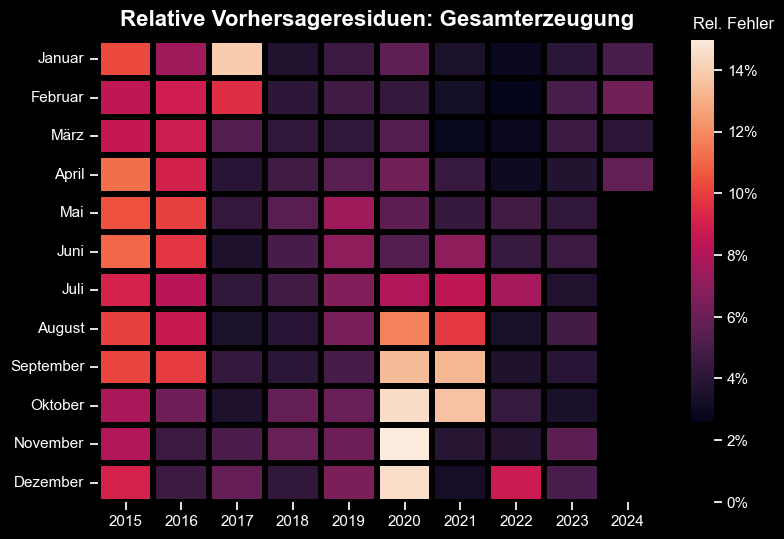

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'axes.grid' : False}) 

german_months = ["Januar", "Februar", "März", "April", "Mai", "Juni", "Juli", "August", "September", "Oktober", "November", "Dezember"]

plt.style.use('dark_background')
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif', 'axes.grid': False})

mre_data = (
    mre_monthly
    .pivot(index="m_i", columns="Jahr", values="MRE Gesamt [MWh]")
)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(mre_data, annot=False, ax=ax, linewidths=3, linecolor='black')

# Y tick labels using the german_months list
ax.set_yticklabels(german_months, rotation=0), ax.grid(color='black'), ax.set_xlabel(''), ax.set_ylabel('')

cbar = ax.collections[0].colorbar
ticks = np.linspace(0, 0.14, num=8)  # Adjust num as needed for desired number of ticks
tick_labels = ['{:.0%}'.format(tick) for tick in ticks]
cbar.ax.set_yticks(ticks)
cbar.ax.set_yticklabels(tick_labels)

# Anotation box above the color scale on the right
cbar = ax.collections[0].colorbar
cbar.ax.text(0.1, 0.155, 'Rel. Fehler', va='center')
ax.set_title("Relative Vorhersageresiduen: Gesamterzeugung", fontsize=16, fontweight='bold', pad=10)
plt.show()


### Grafik: Relative Vorhersageresiduen der Gesamterzeugung

#### Beschreibung:
Diese Heatmap zeigt die relativen Vorhersageresiduen der Gesamtenergieerzeugung in Deutschland für jeden Monat von Januar 2015 bis Dezember 2024. Die Farbskala reicht von dunkelviolett (niedrige relative Fehler von 0%) bis zu dunkelrot (hohe relative Fehler bis zu 14%). Jede Zelle repräsentiert den relativen Fehler eines bestimmten Monats in einem bestimmten Jahr.

#### Interpretation:
**Jahres- und Monatsmuster**: Die Heatmap zeigt, dass die Vorhersagegenauigkeit über die Jahre hinweg variiert, wobei die Genauigkeit in manchen Jahren und Monaten besser ist als in anderen. Besonders auffällig ist die breite Variation der Vorhersagegenauigkeit innerhalb eines Jahres, wobei einige Monate deutlich höhere Fehler aufweisen als andere.

**Zeitliche Verbesserung**: Es gibt eine sichtbare Verbesserung der Vorhersagegenauigkeit im Laufe der Jahre, insbesondere nach 2020. Dies könnte auf verbesserte Vorhersagemethoden, bessere Datenverfügbarkeit oder fortschrittlichere Technologien zur Datenerfassung und -analyse zurückzuführen sein.

**Monatliche Schwankungen**: Die Monate Juni, Juli und August zeigen tendenziell niedrigere Vorhersagefehler, was auf stabilere oder vorhersagbarere Bedingungen für die Energieerzeugung in diesen Sommermonaten hindeuten könnte. Hingegen zeigen die Wintermonate Januar und Februar häufig höhere Fehler, was auf Schwierigkeiten bei der Vorhersage der Energieerzeugung unter möglicherweise volatileren oder weniger vorhersagbaren Wetterbedingungen hinweist. Dies könnte jedoch auch Folge der Anomlaien in den Jahren 2020 und 2021 sein.

#### Schlussfolgerung:
Diese Heatmap zeigt nicht nur, wie sich die Genauigkeit im Laufe der Zeit verbessert hat, sondern auch, dass saisonale Schwankungen einen bedeutenden Einfluss auf die Vorhersagefehler haben. Solche Informationen sind entscheidend für Planungs- und Betriebsentscheidungen in der Energiebranche, insbesondere bei der Integration von erneuerbaren Energiequellen, die wetterabhängig sind und deren Produktion schwerer vorherzusagen ist.

Es ist erkennbar, dass die Genauigkeit der Vorhersagen über die Zeit tendenziell zunimmt, insbesondere nach April 2017. Dies deutet darauf hin, dass die Modelle zur Energievorhersage im Laufe der Zeit verbessert wurden. 

Unsere anfängliche Annahme in unserer Gruppe, dass insbesondere die Monate im Frühjahr (speziell April) und Herbst schwieriger vorherzusagen sind, scheint auf den ersten Blick nicht zuzutreffen. Es zeigt sich keine deutliche Tendenz, dass bestimmte Monate durchgängig herausstechen. Dies könnte jedoch auch durch die Tatsache verschleiert werden, dass die Vorhersagen alle Energiequellen umfassen und somit spezifische saisonale Schwankungen in der Genauigkeit überdeckt werden könnten.

Es bietet sich an, genauer zu analysieren, warum es in bestimmten Zeiträumen, wie im Januar 2017 und Herbst 2020, zu signifikant größeren Abweichungen kam. Eine tiefergehende Untersuchung dieser Zeitpunkte könnte Aufschluss darüber geben, welche externen Faktoren oder Modellannahmen den absoluten Fehler in den Vorhersagen beeinflussen.

### Detailbetrachtung Photovoltaik
In der Analyse der Photovoltaik-Daten wurde zu Beginn des Prozesses eine spezifische Bereinigung vorgenommen, um die Genauigkeit der Datenanalyse zu gewährleisten. Da Photovoltaiksysteme nur tagsüber Strom erzeugen und die Vorhersagen für die Nachtstunden konsequent null sind, resultiert dies in einer "unverdienten" Präzision der Vorhersagegenauigkeit, da tatsächliche und prognostizierte Werte nachts immer null betragen. Um eine realistischere Bewertung der Vorhersageleistung zu ermöglichen, war es notwendig, alle nächtlichen Zeiträume aus der Datenanalyse zu entfernen. 

Dieser Schritt der Datenbereinigung war umfangreich und zeitintensiv. Die gründliche Entfernung der Nachtstunden aus den Photovoltaik-Daten ist entscheidend, um eine überhöhte Genauigkeit der Vorhersagemodelle zu vermeiden und somit die tatsächliche Leistungsfähigkeit der Modelle während der produktiven Tageslichtstunden zu reflektieren.

*Die Fehlermeldung (s.u.) über dem Plot war leider unmöglich zu beheben / abzuschalten, ohne dass es den Plot verändert hätte.*

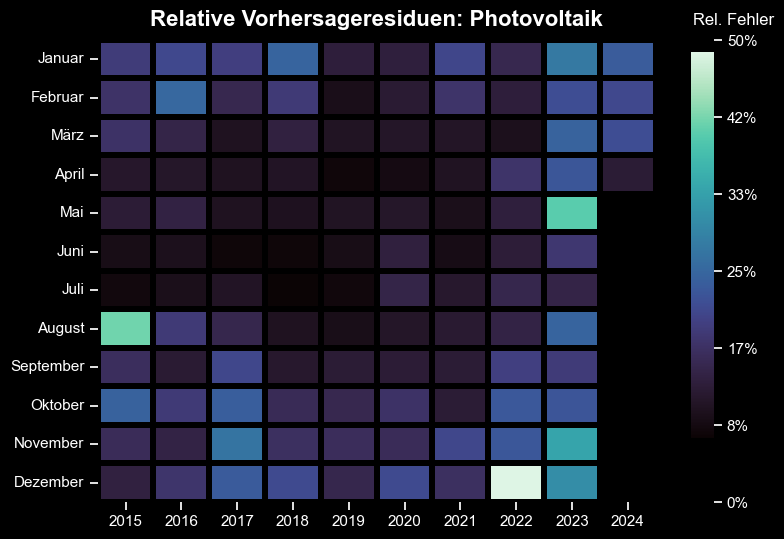

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

german_months = ["Januar", "Februar", "März", "April", "Mai", "Juni", "Juli", "August", "September", "Oktober", "November", "Dezember"]

plt.style.use('dark_background')
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif', 'axes.grid': False})

mre_data = (
    mre_monthly
    .pivot(index="m_i", columns="Jahr", values="MRE Photovoltaik [MWh]")
)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(mre_data, annot=False, ax=ax, linewidths=3, linecolor='black', cmap="mako")

# Y tick labels using the german_months list
ax.set_yticklabels(german_months, rotation=0), ax.grid(color='black'), ax.set_xlabel(''), ax.set_ylabel('')

cbar = ax.collections[0].colorbar
ticks = np.linspace(0, 0.5, num=7)
tick_labels = ['{:.0%}'.format(float(tick)) for tick in ticks]

cbar.ax.set_yticks(cbar.get_ticks()) # this should be included but it messes up the whole plot
cbar.ax.set_yticklabels(tick_labels)

# Anotation box above the color scale on the right

cbar.ax.text(0.1, 0.625, 'Rel. Fehler', va='center')
ax.set_title("Relative Vorhersageresiduen: Photovoltaik", fontsize=16, fontweight='bold', pad=10)
plt.show()


###  Grafik: Relative Vorhersageresiduen: Photovoltaik

#### Beschreibung:
Die Heatmap zeigt die relativen Vorhersagefehler für die Photovoltaik-Stromerzeugung in Deutschland, gegliedert nach Monaten und Jahren von 2015 bis 2024. Die Farbskala reicht von dunkelblau (niedrige relative Fehler um 9%) bis zu hellem Türkis (hohe relative Fehler bis zu 50%).
#### Interpretation:
- **Jahreszeitliche Muster**: Die Grafik illustriert, dass die Vorhersagefehler in den Monaten variieren. Auffällig ist der Monat August über die Jahre hinweg, der tendenziell niedrigere Fehler aufweist, was auf bessere Vorhersagbarkeit der Photovoltaik-Erzeugung in diesem Sommermonat hindeutet.
- **Jährliche Verbesserung**: Es gibt sichtbare Verbesserungen über die Jahre, besonders nach 2020, was darauf hindeutet, dass die Vorhersagemodelle mit der Zeit an Genauigkeit gewinnen. Dies könnte auf die Verbesserung der Technologien, bessere meteorologische Daten und eine zunehmende Erfahrung im Umgang mit Photovoltaiksystemen zurückzuführen sein.
- **Vergleich der Monate**: Während die Wintermonate wie Dezember und Januar tendenziell höhere Fehlerwerte aufweisen, was auf die geringere Sonneneinstrahlung und somit größere Unsicherheiten bei der Vorhersage zurückzuführen sein könnte, zeigen die Sommermonate eine größere Vorhersagegenauigkeit. Dies könnte die stabilere Wetterlage und längere Sonnenstunden widerspiegeln, die eine genauere Prognose ermöglichen.
#### Schlussfolgerung:
Diese Heatmap bietet wertvolle Einblicke in die saisonalen und jährlichen Trends der Vorhersagegenauigkeit von Photovoltaik-Stromerzeugung. Sie zeigt, dass meteorologische Bedingungen einen signifikanten Einfluss auf die Genauigkeit der Energieerzeugungsprognosen haben. Solche Informationen sind besonders wichtig für Energieversorger und Netzbetreiber, um die Integration von Photovoltaikstrom in die Energieversorgung zu optimieren und die Effizienz und Zuverlässigkeit des Stromnetzes zu verbessern.


Analyse der Abweichungen bei der Photovoltaik-Erzeugung:

In der Untersuchung der Photovoltaik-Daten wurden teilweise erhebliche Abweichungen zwischen den prognostizierten und den tatsächlichen Erzeugungswerten festgestellt. Diese Diskrepanzen sind besonders in den Abendstunden aufgetreten, wo die Abweichungen teilweise mehrere Tausend Prozent erreichten. Eine manuelle Überprüfung der Daten hat gezeigt, dass für sonnige Monate wie April bis Juli die Vorhersagen wesentlich präziser sind als in den Herbst- und Wintermonaten.

Um ein tieferes Verständnis dieser Phänomene zu entwickeln, ist ein adäquater weiterführender Plot notwendig, der die Verteilung der Fehler in Bezug auf die Tageszeiten darstellt. Dieser Ansatz ermöglicht es, spezifische Muster zu identifizieren, die während bestimmter Tageszeiten auftreten. Angesichts der extremen Ausreißer in den Daten könnte es sinnvoll sein, den absoluten Fehler zu betrachten und/oder die Daten zu skalieren, um eine bessere Vergleichbarkeit und Analyse zu ermöglichen. Dies könnte in einem separaten DataFrame umgesetzt werden, um die Klarheit und Präzision der Analyse zu erhöhen.

In [149]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

re_photovoltaic_df = re_df[['Zeitstempel',"RE Photovoltaik [MWh]"]].copy()

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

ae_photovoltaic_df['Stunde'] = ae_photovoltaic_df['Zeitstempel'].dt.hour
ae_photovoltaic_df['AE Photovoltaik MMS'] = scaler1.fit_transform(ae_photovoltaic_df[['AE Photovoltaik']])

re_photovoltaic_df['Stunde'] = re_photovoltaic_df['Zeitstempel'].dt.hour
re_photovoltaic_df['RE Photovoltaik MMS'] = scaler2.fit_transform(re_photovoltaic_df[['RE Photovoltaik [MWh]']])

# display(re_photovoltaic_df,ae_photovoltaic_df)
melted_photovoltaic = pd.merge(ae_photovoltaic_df[['Zeitstempel','AE Photovoltaik MMS','Stunde']],re_photovoltaic_df['RE Photovoltaik MMS'], left_index=True, right_index=True)

# photovoltaic_error_with_hours = re_photovoltaic_df.pivot(index='Zeitstempel', columns='Stunde', values='RE Photovoltaik MMS')
melted_photovoltaic = melted_photovoltaic.melt(id_vars=['Zeitstempel', 'Stunde'], var_name='Parameter', value_name='Value')

# # photovoltaic_error_with_hours = photovoltaic_error_with_hours.groupby(photovoltaic_error_with_hours['Zeitstempel'].dt.date).max()
# display(photovoltaic_error_with_hours)


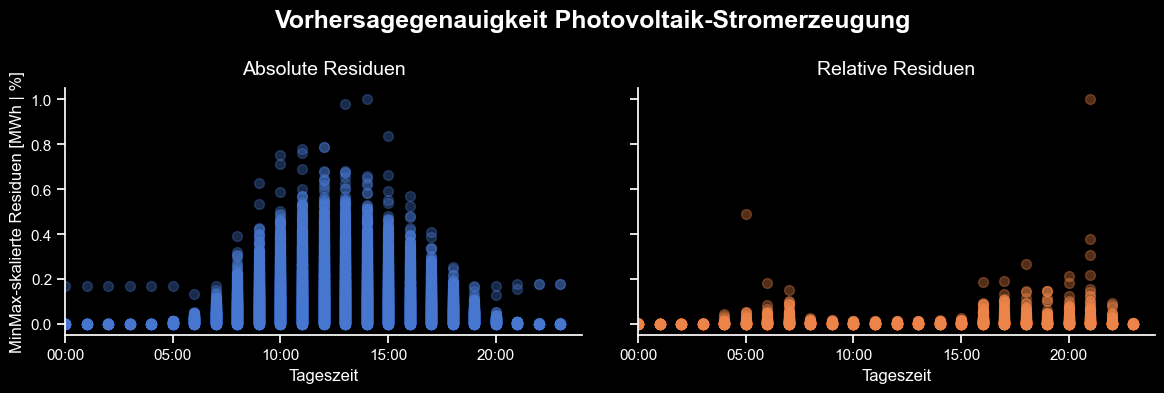

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme and style
sns.set_theme(style="ticks")
plt.style.use('dark_background')

# Define custom facet titles
facet_titles = ["Absolute Residuen", "Relative Residuen"]

# Show the results of a linear regression within each dataset
g = sns.lmplot(
    data=melted_photovoltaic, x="Stunde", y="Value", col="Parameter",
    col_wrap=2, palette="muted", ci=None , line_kws={"linestyle": "None"}, aspect=1.5,hue="Parameter",
    height=4, scatter_kws={"s": 50, "alpha": 0.35}
)

# Set custom facet titles
for ax, title in zip(g.axes.flat, facet_titles):
    ax.set_title(title,fontsize=14, pad=10)

# Set custom x-axis labels and label
g.set_xticklabels(["00:00","00:00","05:00","10:00","15:00","20:00","00:00"], rotation=0)
g.set_axis_labels("Tageszeit", "MinMax-skalierte Residuen [MWh | %]")
plt.suptitle("Vorhersagegenauigkeit Photovoltaik-Stromerzeugung", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust plot layout to accommodate central title
plt.xlim(0, 24)
plt.show()



### Grafik: Vorhersagegenauigkeit Photovoltaik-Stromerzeugung

#### Beschreibung:
Die Grafik besteht aus zwei Teilen, die die Vorhersagegenauigkeit der Photovoltaik-Stromerzeugung anhand von absoluten und relativen Residuen darstellen. Beide Diagramme zeigen die Residuen über den Tagesverlauf:
- **Absolute Residuen (links)**: Dieses Diagramm zeigt die min/max-skalierten Residuen in MW/h. Die vertikale Achse repräsentiert die Residuengröße in MW/h, während die horizontale Achse die Tageszeit von 00:00 bis 20:00 Uhr anzeigt.
- **Relative Residuen (rechts)**: Hier werden die relativen Vorhersagefehler als Prozentsatz dargestellt. Die Skala auf der vertikalen Achse zeigt den Prozentsatz der Abweichung zwischen tatsächlicher und vorhergesagter Erzeugung, und die horizontale Achse folgt dem gleichen Zeitrahmen.
#### Interpretation:
- **Absolute Residuen**: Die Daten zeigen, dass die Vorhersagefehler zur Mittagszeit, insbesondere zwischen 10:00 und 15:00 Uhr, ihren Höhepunkt erreichen. Dies korreliert mit den Spitzenzeiten der Sonneneinstrahlung, wenn die Photovoltaik-Stromerzeugung am höchsten ist. Die höheren Fehler in dieser Zeit könnten darauf hindeuten, dass die Vorhersagemodelle Schwierigkeiten haben, die Spitzenleistung genau zu prognostizieren.
- **Relative Residuen**: Die relativen Fehler sind nachts und in den frühen Morgenstunden höher, wenn die Erzeugung am niedrigsten ist. Dies impliziert, dass geringere Erzeugungsniveaus zu prozentual größeren Fehlern führen, was auf die Grundschwierigkeit hinweist, sehr niedrige Produktionswerte genau vorherzusagen.
#### Schlussfolgerung:
Die Analyse der Vorhersagegenauigkeit für Photovoltaik-Stromerzeugung zeigt signifikante Unterschiede in der Vorhersageleistung über den Tagesverlauf. Besonders die hohen absoluten Fehler während der Mittagszeit und die hohen relativen Fehler außerhalb der Spitzenproduktionszeiten verdeutlichen die Herausforderungen bei der genauen Prognose der Photovoltaik-Stromerzeugung. Solche Informationen sind entscheidend für die Optimierung von Vorhersagemodellen und das Management von Netzwerken, insbesondere im Hinblick auf die Integration erneuerbarer Energien und die Gewährleistung einer zuverlässigen Stromversorgung.



Die Analyse der Prognosefehler in der Photovoltaik-Erzeugung zeigt deutlich, dass die Vorhersagegenauigkeit in Zeiten höherer Produktion, also tagsüber, besser ist, da hier die absoluten Werte naturgemäß höher ausfallen. Allerdings weisen die Vorhersagen am Morgen und am Abend wesentlich größere Ungenauigkeiten auf und zeigen teilweise extreme Ausreißer. Diese Tendenzen lassen sich besonders in den Stunden kurz nach Sonnenaufgang und vor Sonnenuntergang beobachten.

Es wurde festgestellt, dass die Prognosegenauigkeit in Zeiträumen – sowohl auf monatlicher als auch auf stündlicher Basis –, in denen durchschnittlich mehr Sonnenschein herrscht, generell präziser ist. Dies bestätigt die Beobachtung, dass Sonnenschein einen signifikanten Einfluss auf die Qualität der Vorhersagen hat. Während sonnenreiche Monate wie April bis Juli zuverlässigere Prognosen ermöglichen, führen die variablen Sonnenbedingungen in den Morgen- und Abendstunden zu größeren Abweichungen in den Vorhersagedaten.

# Weiter mit  MRE Wind Offshore [MWh]	MRE Wind Onshore [MWh]

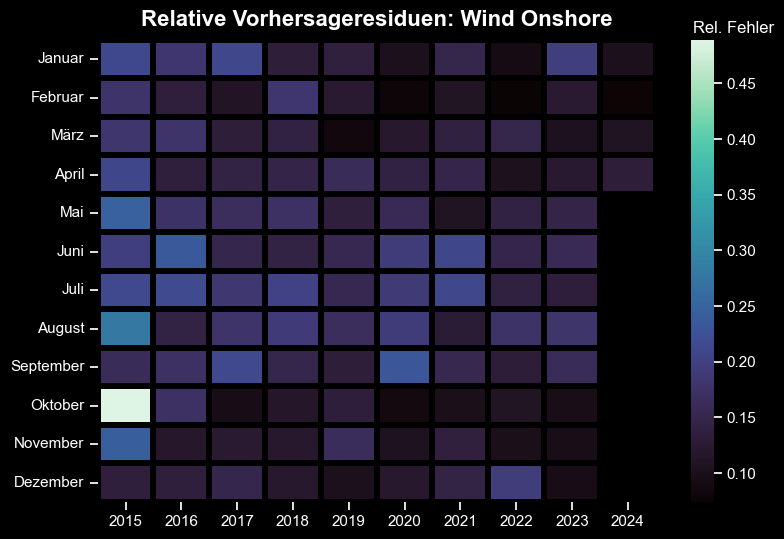

In [151]:

german_months = ["Januar", "Februar", "März", "April", "Mai", "Juni", "Juli", "August", "September", "Oktober", "November", "Dezember"]

plt.style.use('dark_background')
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif', 'axes.grid': False})

mre_data = (
    mre_monthly
    .pivot(index="m_i", columns="Jahr", values="MRE Wind Onshore [MWh]")
)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(mre_data, annot=False, ax=ax, linewidths=3, linecolor='black', cmap="mako")

# Y tick labels using the german_months list
ax.set_yticklabels(german_months, rotation=0), ax.grid(color='black'), ax.set_xlabel(''), ax.set_ylabel('')

# Farbskala
cbar = ax.collections[0].colorbar
# ticks = np.linspace(0.01, 0.5, num=7)
# tick_labels = ['{:.0%}'.format(float(tick)) for tick in ticks]

# cbar.ax.set_yticks(cbar.get_ticks()) # this should be included but it messes up the whole plot
# cbar.ax.set_yticklabels(tick_labels)

# Anotation box above the color scale on the right

cbar.ax.text(0.1, 0.5, 'Rel. Fehler', va='center')
ax.set_title("Relative Vorhersageresiduen: Wind Onshore", fontsize=16, fontweight='bold', pad=10)
plt.show()

### Grafik: Relative Vorhersageresiduen für Wind Onshore

#### Beschreibung
Diese Heatmap zeigt die relativen Vorhersagefehler für die Onshore-Windenergieerzeugung in Deutschland von Januar 2015 bis Dezember 2024. Jede Zelle innerhalb der Heatmap repräsentiert den relativen Fehler für einen bestimmten Monat und ein bestimmtes Jahr. Die Farbskala reicht von dunklem Lila bis hellem Türkis und zeigt relative Fehler von 0,10 (10 %) bis 0,45 (45 %).

#### Interpretation
- **Allgemeine Trends**: Die Heatmap zeigt generell dunklere Töne, was auf höhere relative Vorhersagefehler in den meisten Monaten und Jahren hinweist. Dies deutet darauf hin, dass die Vorhersage der Onshore-Windenergieerzeugung im Vergleich zu anderen Energiequellen wie Solarenergie eine höhere Unsicherheit aufweist. Dies ist wahrscheinlich auf die inhärente Variabilität der Windgeschwindigkeiten und die Herausforderungen bei der genauen Modellierung dieser Variabilität über Zeit und geografische Verteilung zurückzuführen.

- **Saisonale Variationen**: Auffällig sind Bereiche mit helleren Schattierungen, insbesondere im Oktober über mehrere Jahre hinweg und in einigen Fällen im August und September. Dies könnte darauf hindeuten, dass die Vorhersagemodelle in diesen Monaten leicht besser funktionieren, möglicherweise aufgrund stabilerer oder vorhersehbarerer Windbedingungen, die für diese Zeiträume typisch sind.

- **Jährliche Verbesserungen**: Es gibt keinen klaren Trend, der auf eine signifikante Verbesserung über die Jahre hinweist. Dieses konstante Fehlerlevel könnte auf anhaltende Herausforderungen in der Fähigkeit der Modelle hinweisen, das Windverhalten anzupassen oder vorherzusagen, das durch eine Vielzahl von Faktoren wie atmosphärischen Veränderungen und geografischen Unterschieden beeinflusst werden kann.

#### Schlussfolgerung
Die Heatmap der relativen Vorhersageresiduen für die Onshore-Windenergieerzeugung unterstreicht die Komplexitäten und Herausforderungen, die mit der Vorhersage der Windenergieproduktion verbunden sind. Die relativ hohen und konsistenten Fehlerquoten spiegeln die volatile Natur des Windes und die Schwierigkeit wider, diese Variabilität in Vorhersagemodellen zu erfassen. Die leichten Verbesserungen in bestimmten Monaten könnten weiter erforscht werden, um das Verständnis zu vertiefen und möglicherweise die Leistung der Modelle in diesen Perioden zu verbessern. Diese Analyse hebt die Bedeutung kontinuierlicher Forschung und Entwicklung in der Wettervorhersage und Modellierungstechniken hervor, um Windmuster besser vorhersagen und die Integration von Windenergie in die Energieversorgungssysteme optimieren zu können.


### --> Was passierte im Oktober 2015? Waren die Vorhersagen zu hoch oder zu niedrig?
Um zu bestimmen, was im Oktober 2015 hinsichtlich der Vorhersagegenauigkeit der Energieerzeugung passierte und ob die Vorhersagen zu hoch oder zu niedrig waren, wird zunächst eine Filterung der relevanten Datensätze für diesen spezifischen Monat vorgenommen. Dies umfasst sowohl die tatsächlichen Energieerzeugungsdaten als auch die entsprechenden Vorhersagewerte.
Nach der Selektion der Daten wird eine grafische Darstellung erstellt, die die tatsächliche Energieerzeugung im Vergleich zu den Vorhersagen für Oktober 2015 zeigt. 
Durch die Analyse dieser Visualisierung wird beurteilt, ob die Vorhersagen für diesen Monat generell zu hoch oder zu niedrig waren, wobei ein besonderes Augenmerk auf signifikante Abweichungen zwischen den prognostizierten und den tatsächlichen Werten gelegt wird. Diese Untersuchung ermöglicht die Bewertung der Präzision der verwendeten Vorhersagemodelle und liefert wichtige Erkenntnisse für die Weiterentwicklung und Verbesserung der Vorhersagegenauigkeit

In [152]:
# Filtern der Daten für Oktober 2015
october_2015_realized = realized_df[(realized_df['Zeitstempel'] >= '2015-10-01') & (realized_df['Zeitstempel'] < '2015-11-01')][["Zeitstempel","Wind Onshore [MWh]"]]
october_2015_forecast = forecast_df[(forecast_df['Zeitstempel'] >= '2015-10-01') & (forecast_df['Zeitstempel'] < '2015-11-01')][["Zeitstempel","Wind Onshore [MWh]"]]
october_2015_realized.rename(columns={"Wind Onshore [MWh]":"Erzeugung Wind Onshore [MWh]"}, inplace=True)
october_2015_forecast.rename(columns={"Wind Onshore [MWh]":"Vorhersage Wind Onshore [MWh]"}, inplace=True)
october_2015_merged = pd.merge(october_2015_realized,october_2015_forecast["Vorhersage Wind Onshore [MWh]"], left_index=True, right_index=True)

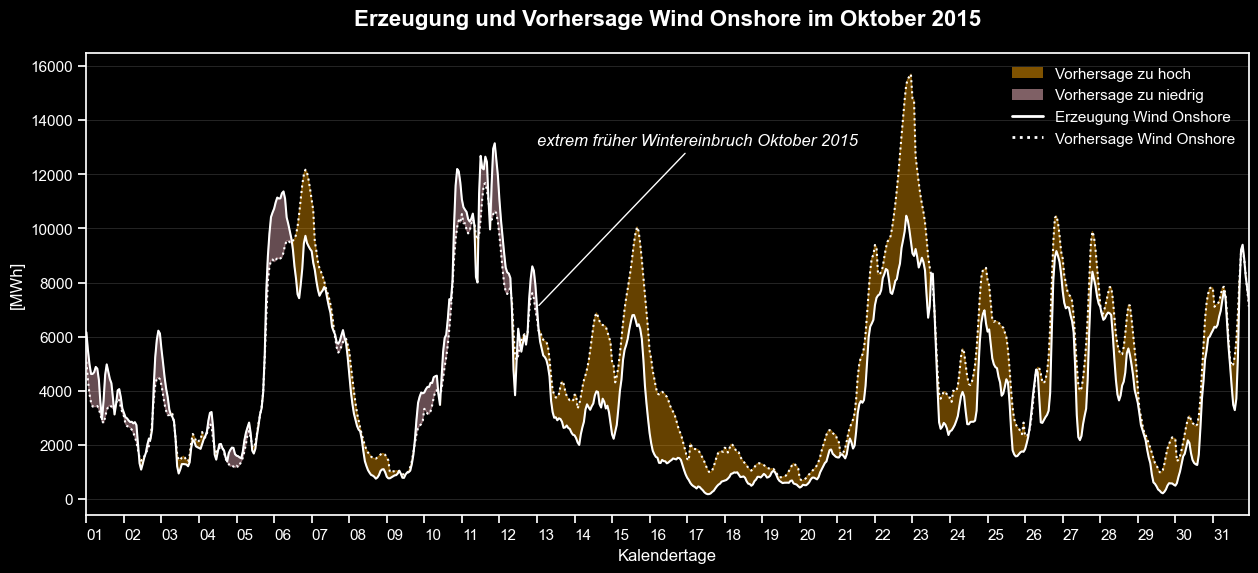

In [156]:
# Set the style
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
sns.set_theme(style="ticks")
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif', 'axes.grid': False})

# Plotting the data
plt.figure(figsize=(15, 6))
sns.lineplot(data=october_2015_merged, x='Zeitstempel', y='Erzeugung Wind Onshore [MWh]', linewidth= 1.5,label='Erzeugung Wind Onshore', color='white')
sns.lineplot(data=october_2015_merged, x='Zeitstempel', y='Vorhersage Wind Onshore [MWh]', linewidth= 1.5,linestyle="dotted", label='Vorhersage Wind Onshore', color='white')

condition = october_2015_merged['Vorhersage Wind Onshore [MWh]'] > october_2015_merged['Erzeugung Wind Onshore [MWh]']
plt.fill_between(october_2015_merged['Zeitstempel'], october_2015_merged['Erzeugung Wind Onshore [MWh]'], october_2015_merged['Vorhersage Wind Onshore [MWh]'], where=condition, color='orange', alpha=0.4)
plt.fill_between(october_2015_merged['Zeitstempel'], october_2015_merged['Erzeugung Wind Onshore [MWh]'], october_2015_merged['Vorhersage Wind Onshore [MWh]'], where=~condition, color='pink', alpha=0.4)

# Adding labels and title
plt.xlabel('Kalendertage')
plt.ylabel('[MWh]')
plt.title('Erzeugung und Vorhersage Wind Onshore im Oktober 2015',fontsize=16, fontweight='bold',pad=20)
plt.xticks(rotation=0, ha="left")
plt.legend(handles=[Patch(facecolor='orange', alpha=0.5, edgecolor='none', label='Vorhersage zu hoch'),
                    Patch(facecolor='pink', alpha=0.5, edgecolor='none', label='Vorhersage zu niedrig'),
                    Line2D([0], [0], color='white', lw=2, label='Erzeugung Wind Onshore'),
                    Line2D([0], [0], color='white', linestyle='dotted', lw=2, label='Vorhersage Wind Onshore')],
                    frameon=False)

import matplotlib.dates as mdates
days = mdates.DayLocator()
plt.gca().xaxis.set_major_locator(days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.xlim(october_2015_merged.iloc[0]['Zeitstempel'], october_2015_merged.iloc[-1]['Zeitstempel'])

day_index = 24 * 12 # 13. Oktober zu früher Wintereinbruch 
plt.annotate('extrem früher Wintereinbruch Oktober 2015', xy=(october_2015_merged.iloc[day_index]['Zeitstempel'],
                                                   october_2015_merged.iloc[day_index]['Erzeugung Wind Onshore [MWh]']),
             xytext=(october_2015_merged.iloc[day_index]['Zeitstempel'],
                      october_2015_merged.iloc[day_index]['Erzeugung Wind Onshore [MWh]']+6000),  # Adjust the xytext position as needed
             arrowprops=dict(facecolor='white', arrowstyle='-'),
             fontsize=12, fontstyle='italic', color='white',ha='left')
plt.grid(axis='y', linestyle='-', linewidth=0.5, color='white', alpha=0.2)

plt.show()



### Grafik: Produktion und Prognose von Onshore-Wind im Oktober 2015
#### **Beschreibung:**
Dieses Liniendiagramm zeigt die tatsächliche und prognostizierte Onshore-Windenergieerzeugung (in MW/h) für Oktober 2015. Es unterscheidet zwischen tatsächlicher Erzeugung (durchgezogene weiße Linie), prognostizierter Erzeugung (gestrichelte Linie) und Abweichungen in der Vorhersage (gelbe und graue Bereiche).

#### **Interpretation:**
Trends: Schwankungen in der Windenergieerzeugung im Monatsverlauf spiegeln die variable Natur der Windenergie wider. Prognosen verfolgen diese Veränderungen, aber mit variabler Genauigkeit.
Genauigkeit: Deutliche Diskrepanzen zwischen Vorhersagen und tatsächlicher Erzeugung, markiert durch gelbe (Überschätzung) und graue (Unterschätzung) Bereiche.
Wetterereignis: Ein früher Wintereinbruch im Oktober 2015 könnte Einfluss auf die Vorhersagegenauigkeit gehabt haben.

Laut einer Quelle ereignete sich Mitte Oktober 2015 ein außergewöhnlicher Wintereinbruch, bei dem in Teilen Deutschlands bereits Schnee fiel. 
Link zur Quelle: https://www.wettergefahren-fruehwarnung.de/Ereignis/20151016_e.html

#### **Schlussfolgerung:**
Das Diagramm verdeutlicht die Herausforderungen bei der Vorhersage der Windenergieerzeugung, insbesondere bei plötzlichen Wetterveränderungen. Es unterstreicht die Bedeutung flexibler Energiemanagementsysteme für erneuerbare Energien. Weitere Verbesserungen in den Vorhersagemodellen sind nötig, um unvorhersehbare Wetterphänomene besser zu berücksichtigen.

Die Analyse der Energieerzeugungsdaten von Oktober 2015 zeigt signifikante Abweichungen in den Vorhersagen, insbesondere gegen Monatsende. Ein früher Wintereinbruch könnte zu diesen Abweichungen beigetragen haben, da er möglicherweise nicht ausreichend in den Vorhersagemodellen berücksichtigt wurde. Weitere Untersuchungen sind erforderlich, um die Gründe für diese Abweichungen zu klären und die Vorhersagemodelle zu verbessern.

*Bei der Erstellung der Grafiken haben wir uns keinerlei Vorbilder bedient außer den Samples aus der Seaborn Dokumentation: https://seaborn.pydata.org/examples/index.html*